In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
# Make train and validation generator

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_folder_path = '/content/MyDrive/MyDrive/DS programming assignments /Capestone project/Covid19-dataset/train'

image_size = (224, 224)
batch_size = 32


datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = datagen.flow_from_directory(image_folder_path,target_size=image_size,batch_size=batch_size,class_mode='categorical',subset='training')

validation_generator = datagen.flow_from_directory(image_folder_path,target_size=image_size,batch_size=batch_size,class_mode='categorical',subset='validation')


Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

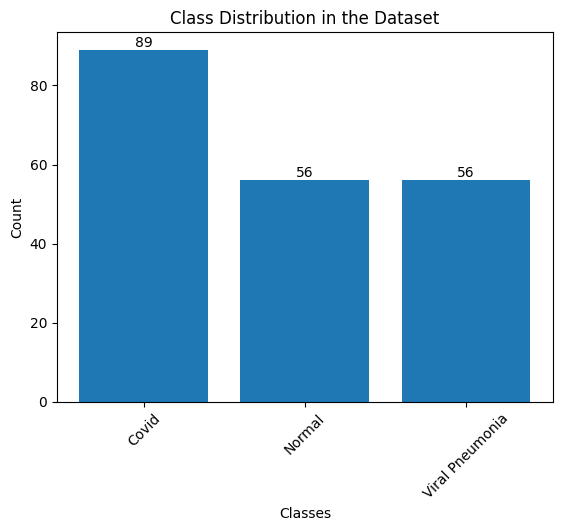

In [ ]:
# Show nummber of classes in the training set

import matplotlib.pyplot as plt
class_names = train_generator.class_indices

class_names = {v: k for k, v in class_names.items()}

class_counts = train_generator.classes
class_count_dict = {}
for label in class_counts:
    class_name = class_names[label]
    class_count_dict[class_name] = class_count_dict.get(class_name, 0) + 1

plt.bar(class_count_dict.keys(), class_count_dict.values())
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=45)

for i, count in enumerate(class_count_dict.values()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [ ]:
class_names

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [ ]:

class_names = train_generator.class_indices

class_names = {v: k for k, v in class_names.items()}

print("Class Names:")
for label, name in class_names.items():
    print(f"{label}: {name}")

Class Names:
0: Covid
1: Normal
2: Viral Pneumonia


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

# Output layer with softmax activation for multi-class classification
model.add(Dense(len(class_names), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
# Set the number of training and validation steps
# The number of steps is calculated as (total number of samples) / (batch size)
num_train_samples = len(train_generator.filenames)
num_validation_samples = len(validation_generator.filenames)
train_steps = num_train_samples // batch_size
validation_steps = num_validation_samples // batch_size

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


Epoch 1/10
6/6 [==============================] - 34s 6s/step - loss: 3.0639 - accuracy: 0.3373 - val_loss: 0.9688 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 30s 5s/step - loss: 1.0490 - accuracy: 0.5385 - val_loss: 0.9711 - val_accuracy: 0.8125
Epoch 3/10
6/6 [==============================] - 31s 6s/step - loss: 0.7804 - accuracy: 0.8107 - val_loss: 0.4896 - val_accuracy: 0.9062
Epoch 4/10
6/6 [==============================] - 31s 5s/step - loss: 0.4396 - accuracy: 0.8462 - val_loss: 0.3219 - val_accuracy: 0.9062
Epoch 5/10
6/6 [==============================] - 30s 5s/step - loss: 0.4061 - accuracy: 0.8462 - val_loss: 0.5352 - val_accuracy: 0.7500
Epoch 6/10
6/6 [==============================] - 31s 5s/step - loss: 0.4158 - accuracy: 0.8343 - val_loss: 0.5862 - val_accuracy: 0.7500
Epoch 7/10
6/6 [==============================] - 31s 5s/step - loss: 0.2601 - accuracy: 0.8876 - val_loss: 0.2023 - val_accuracy: 0.9688
Epoch 8/10
6/6 [==================

In [ ]:
model.save("/content/MyDrive/MyDrive/DS programming assignments /Capestone project/Covid19-dataset/Model_1.model")

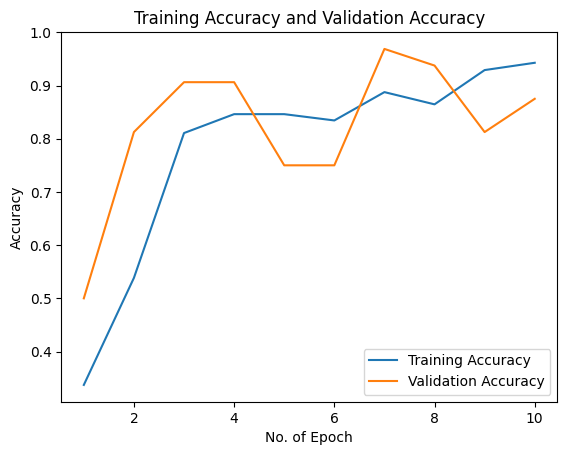

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('No. of Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy and Validation Accuracy')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import cv2
import numpy as np

single_image_path = "/content/MyDrive/MyDrive/DS programming assignments /Capestone project/Covid19-dataset/test/Viral Pneumonia/0114.jpeg"

def preprocess_image(image_path, image_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (image_size, image_size))
    image = image / 255.0
    return image


image_size = 224

single_image = preprocess_image(single_image_path, image_size)


In [ ]:

single_image = np.expand_dims(single_image, axis=0)


In [ ]:

predictions = model.predict(single_image)
predicted_class_index = np.argmax(predictions[0])


predicted_class_name = class_names[predicted_class_index]

print("Predicted class:", predicted_class_name)


1/1 [==============================] - 0s 138ms/step
Predicted class: Viral Pneumonia


In [ ]:
test_path = "/content/MyDrive/MyDrive/DS programming assignments /Capestone project/Covid19-dataset/test"

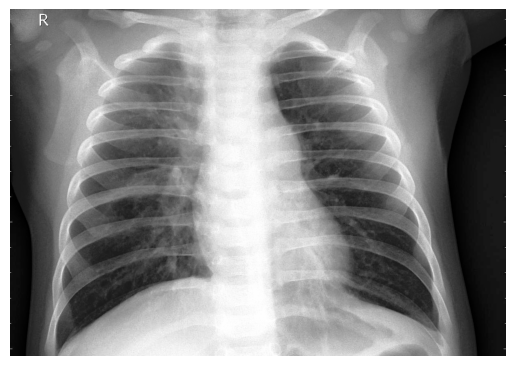

In [ ]:
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image_path = '/content/MyDrive/MyDrive/DS programming assignments /Capestone project/Covid19-dataset/test/Viral Pneumonia/0120.jpeg'
image = mpimg.imread(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()



In [ ]:
from imutils import paths
import random
from tensorflow.keras.preprocessing.image import img_to_array
import imutils

In [ ]:
import imutils
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid()
    ax = fig.add_subplot(111)
    ax.imshow(img)

[INFO] loading images...


  0%|          | 0/66 [00:00<?, ?it/s]

1/1 [==============================] - 0s 60ms/step


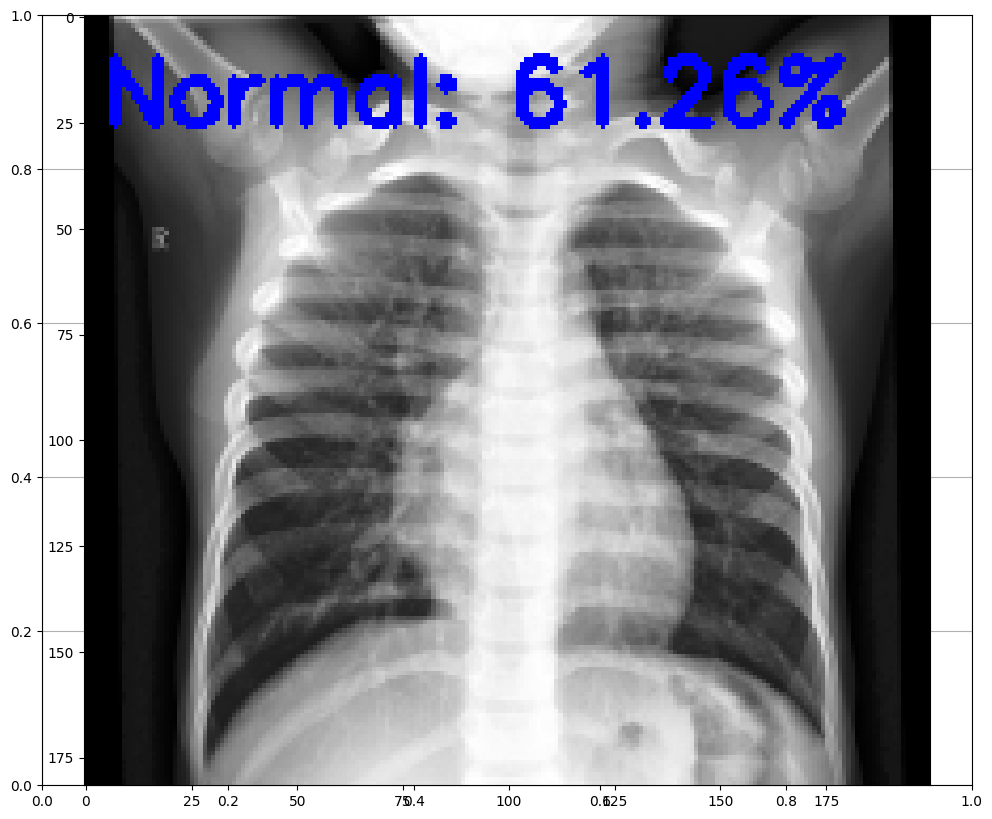

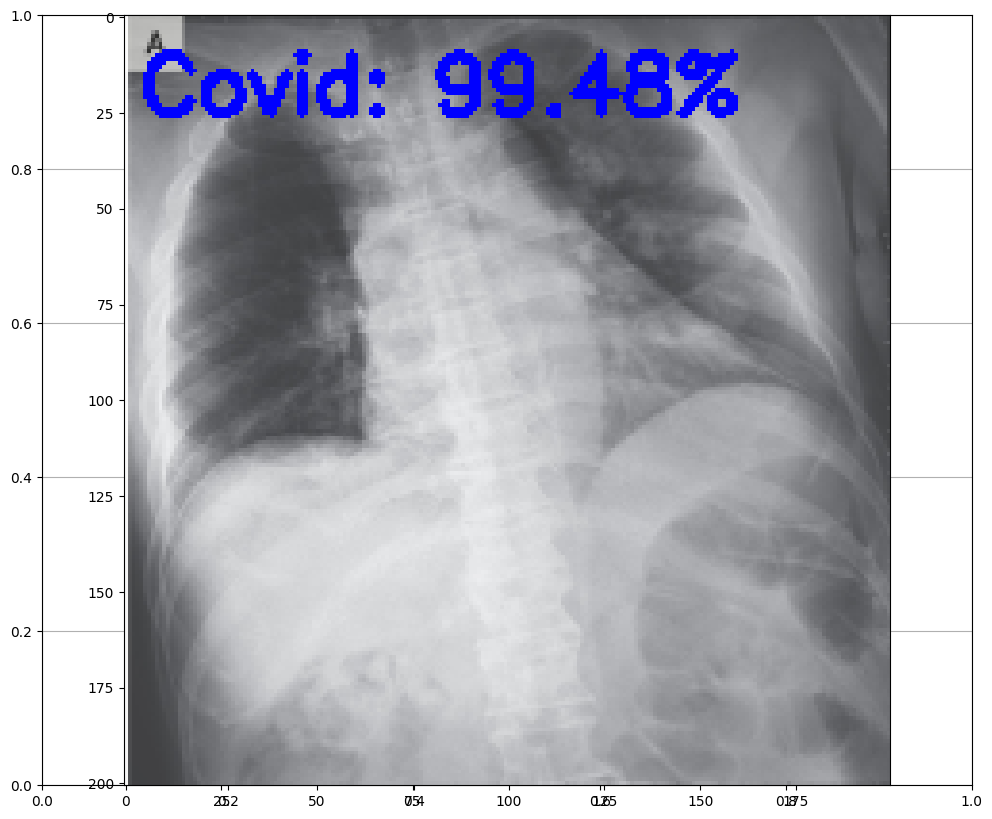

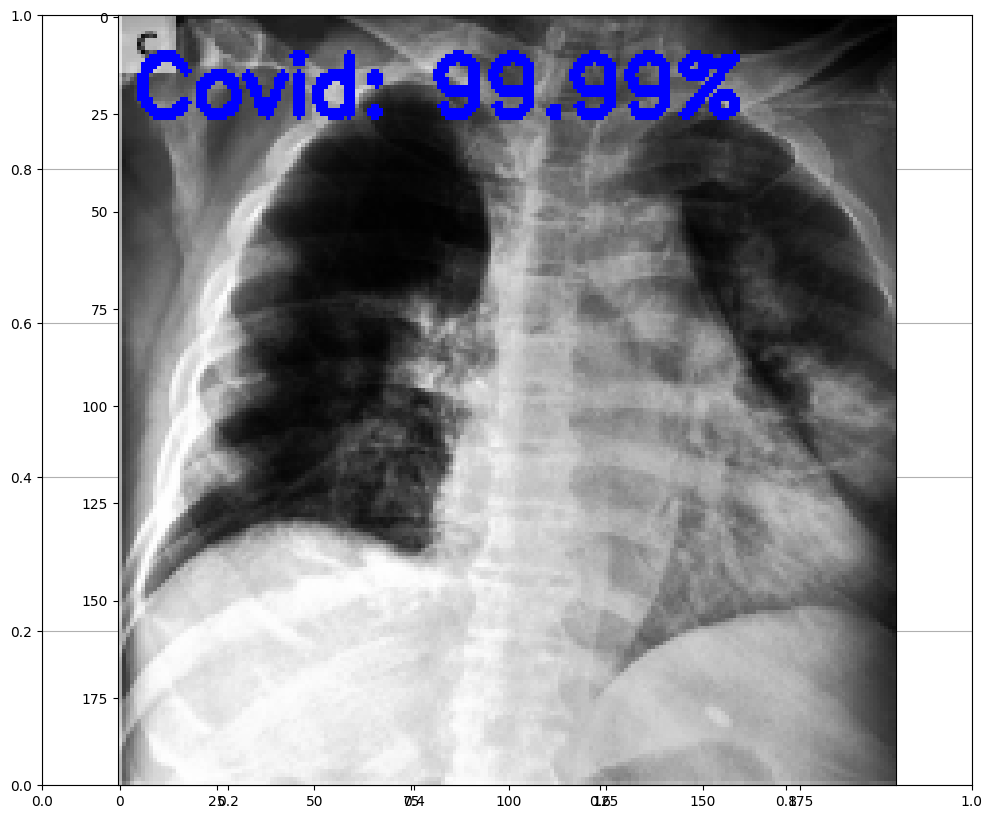

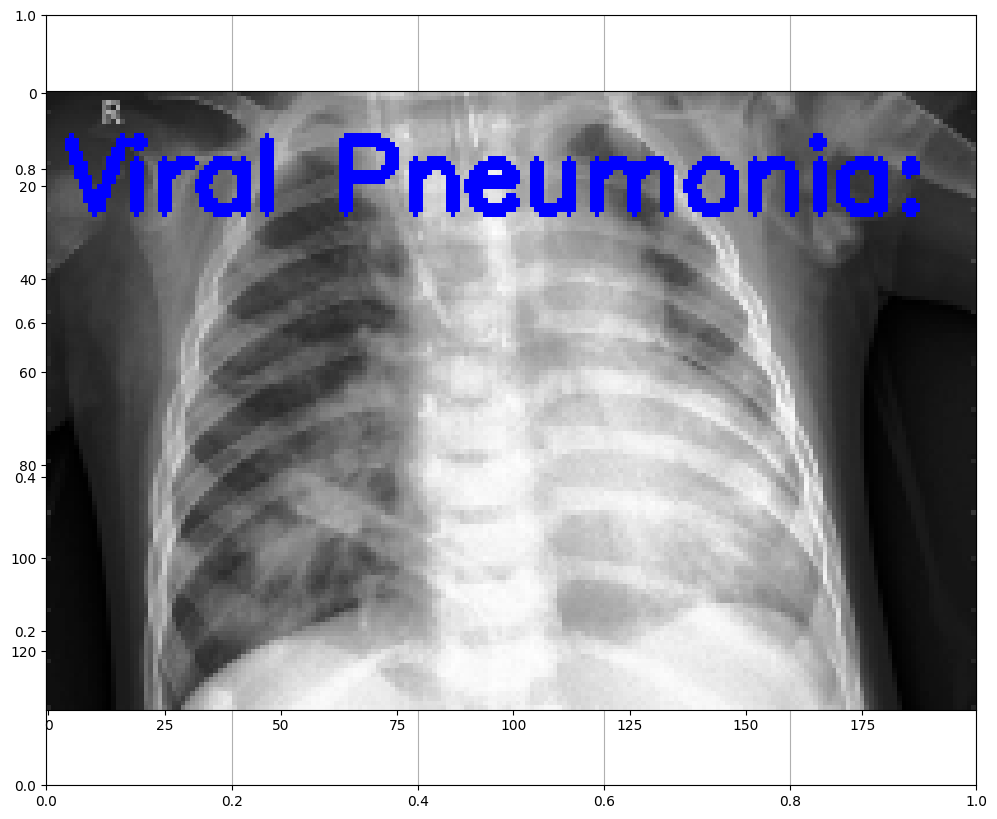

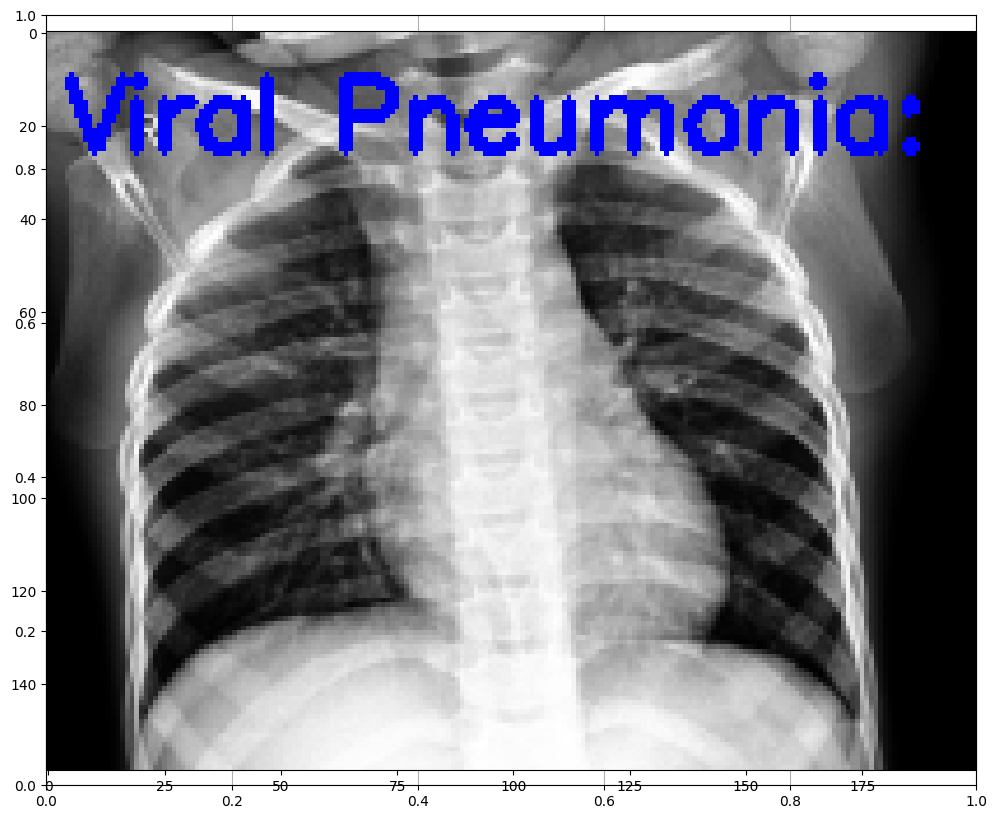

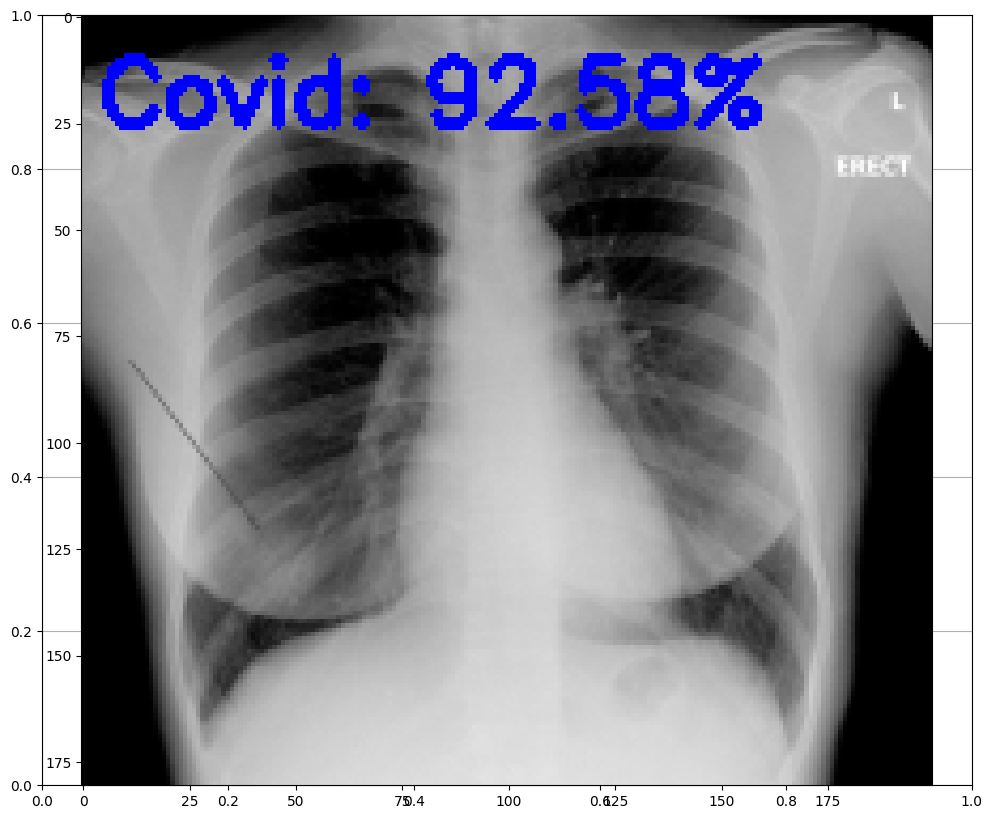

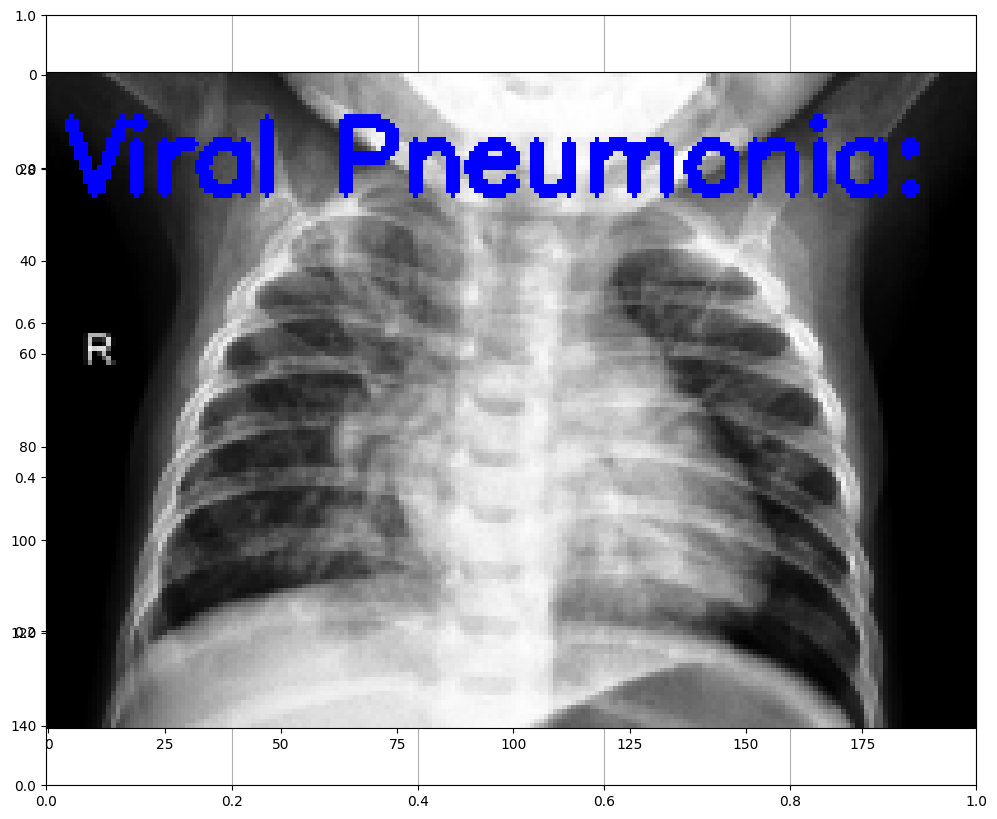

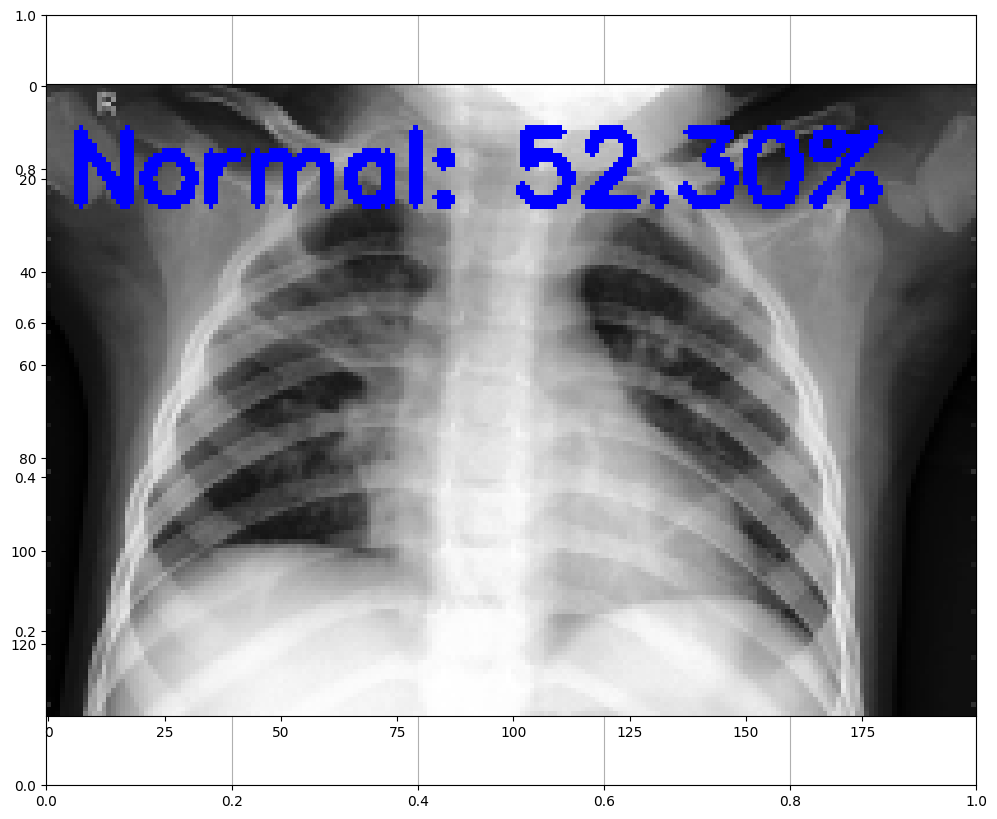

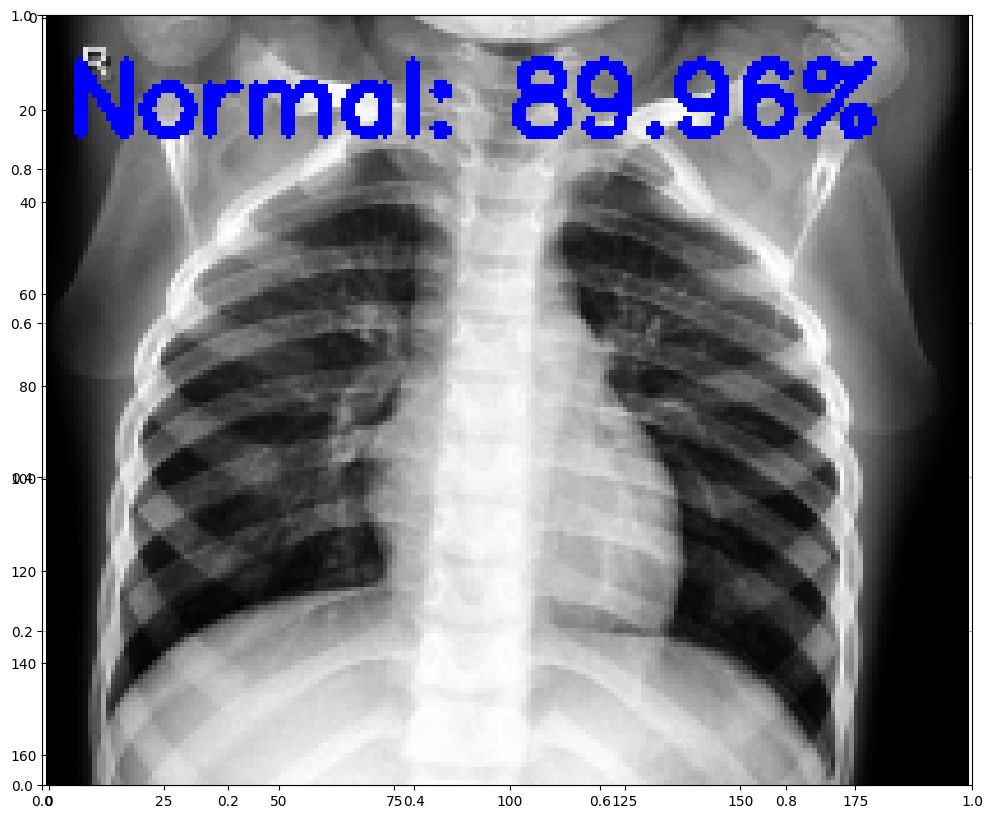

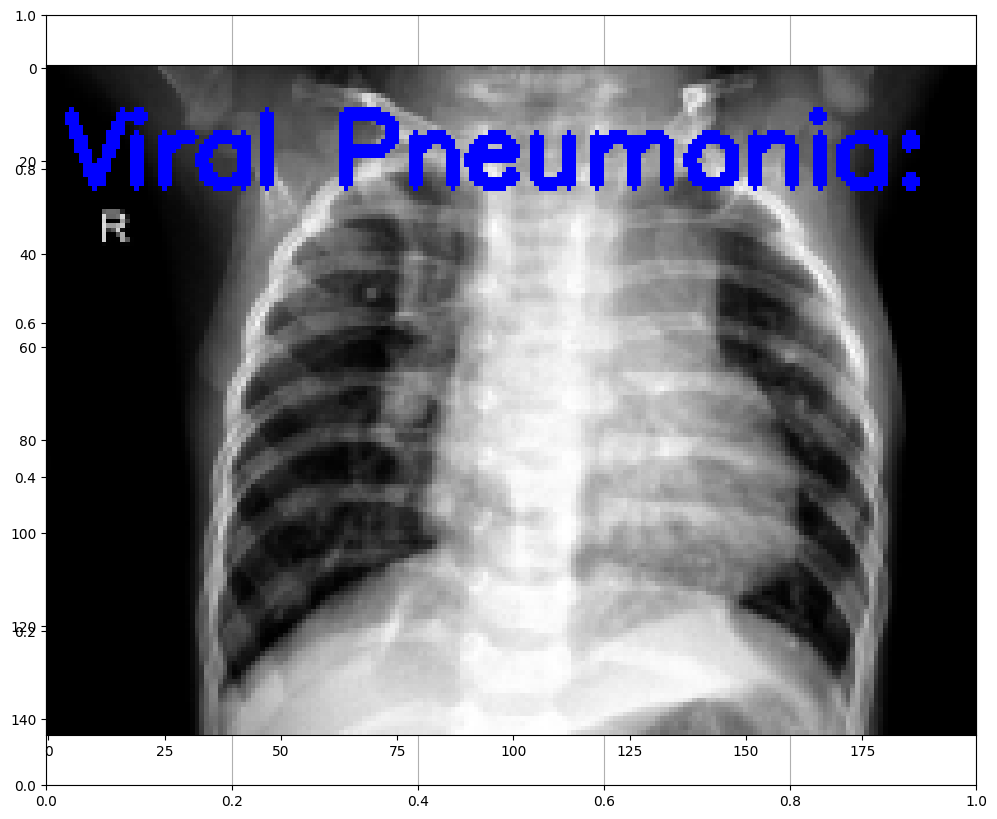

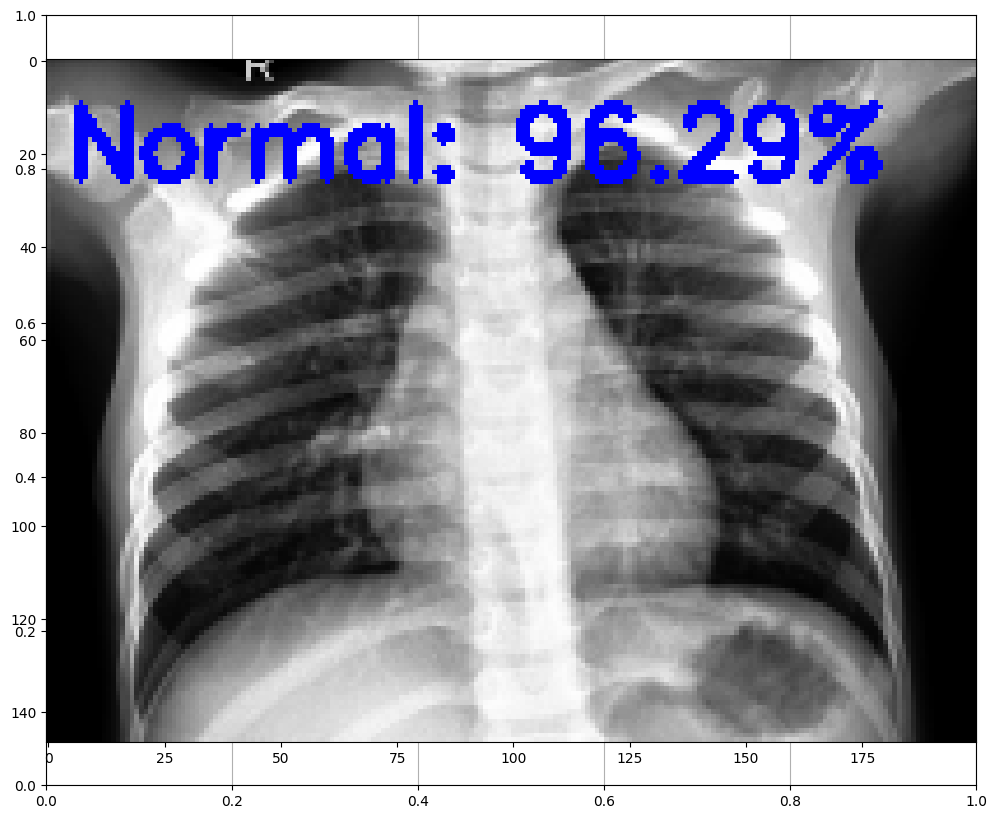

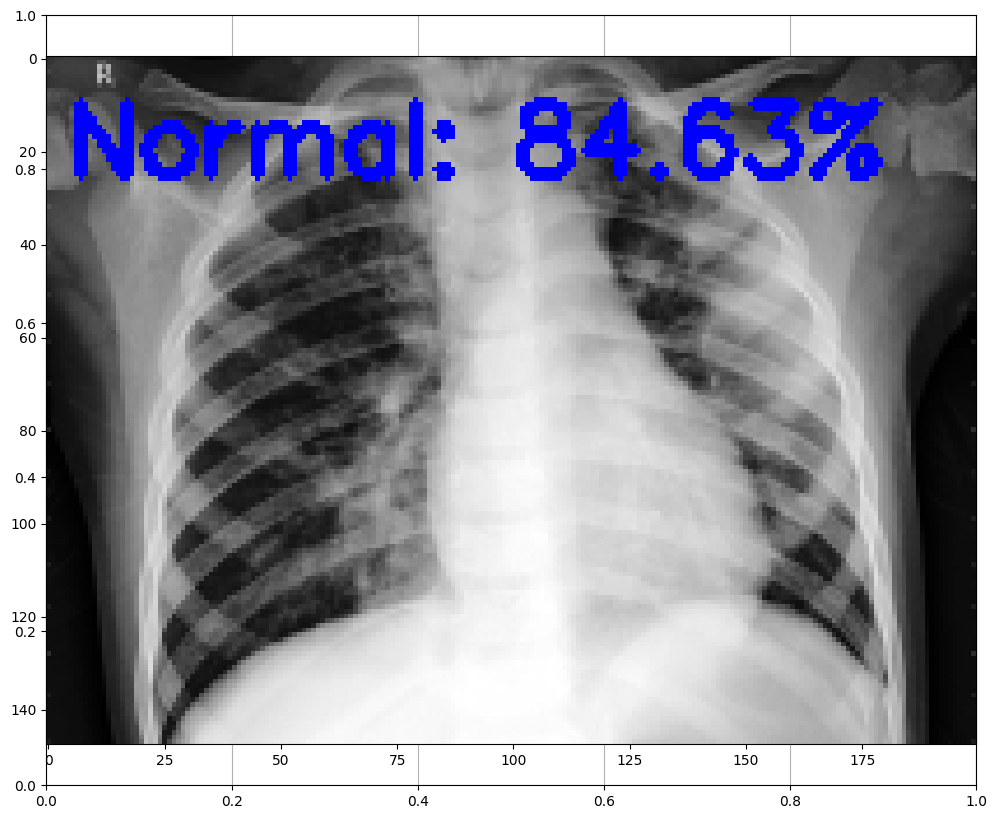

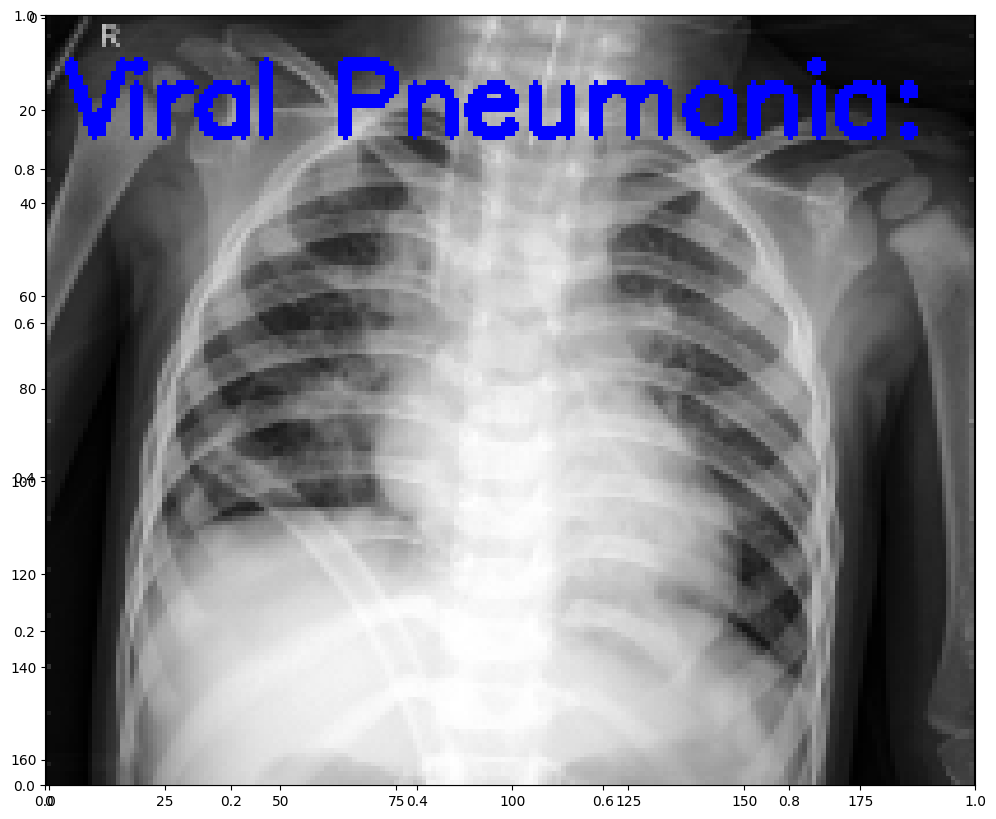

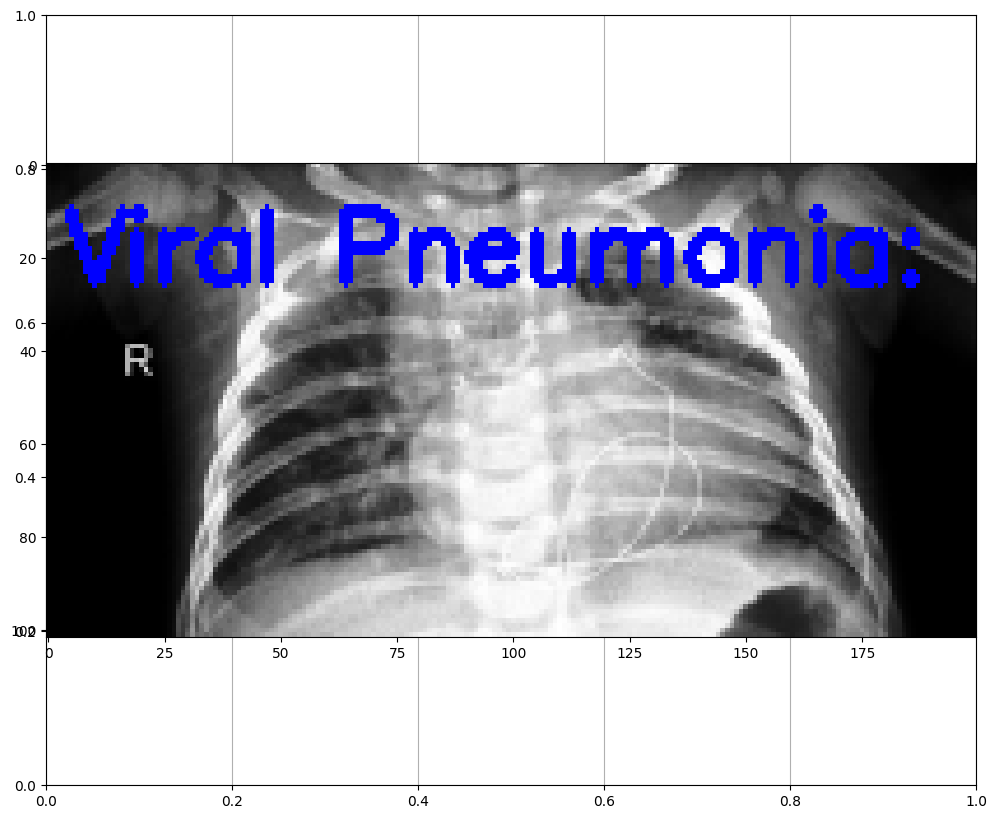

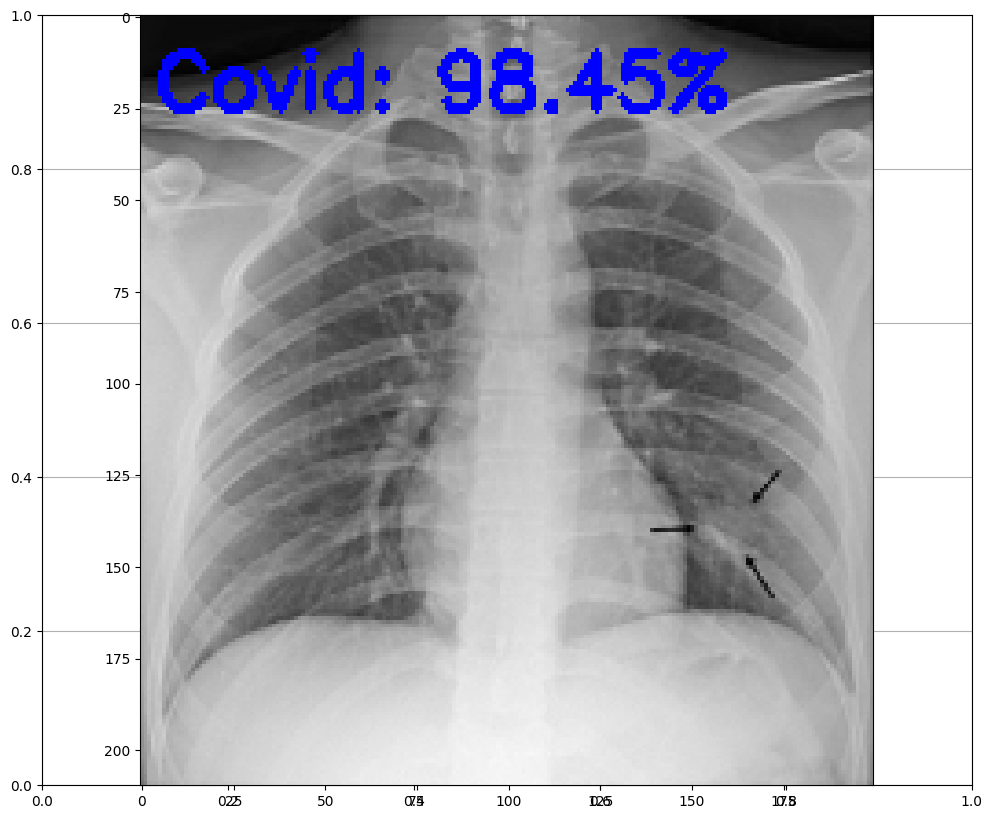

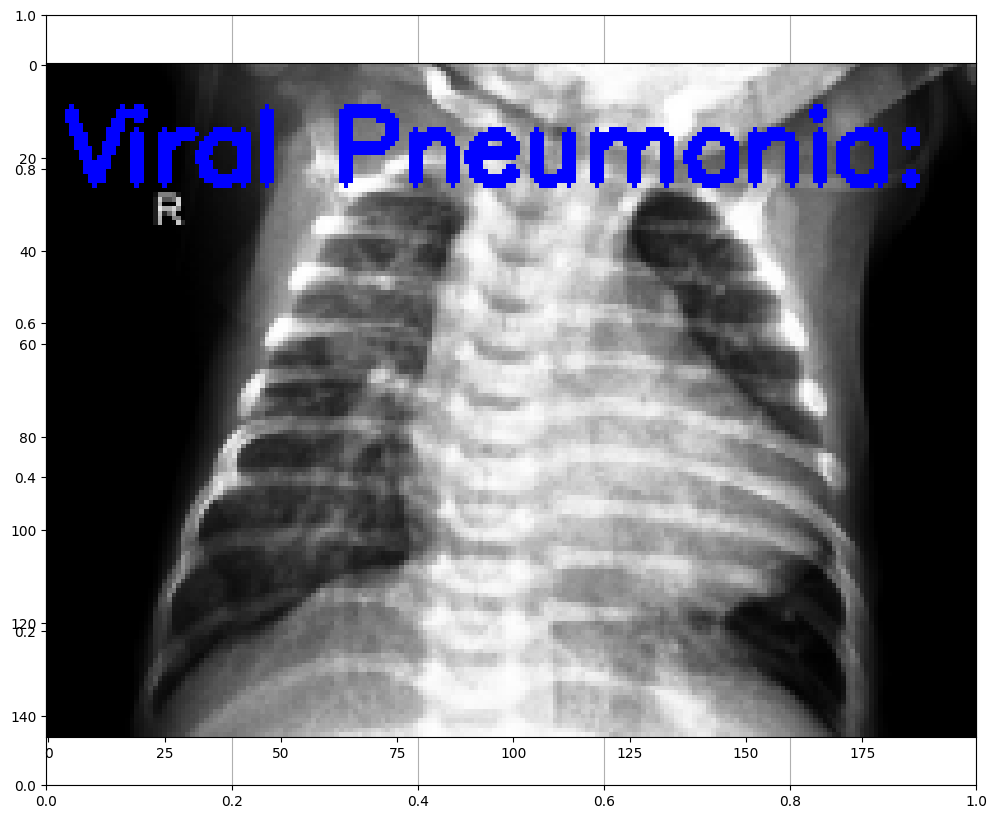

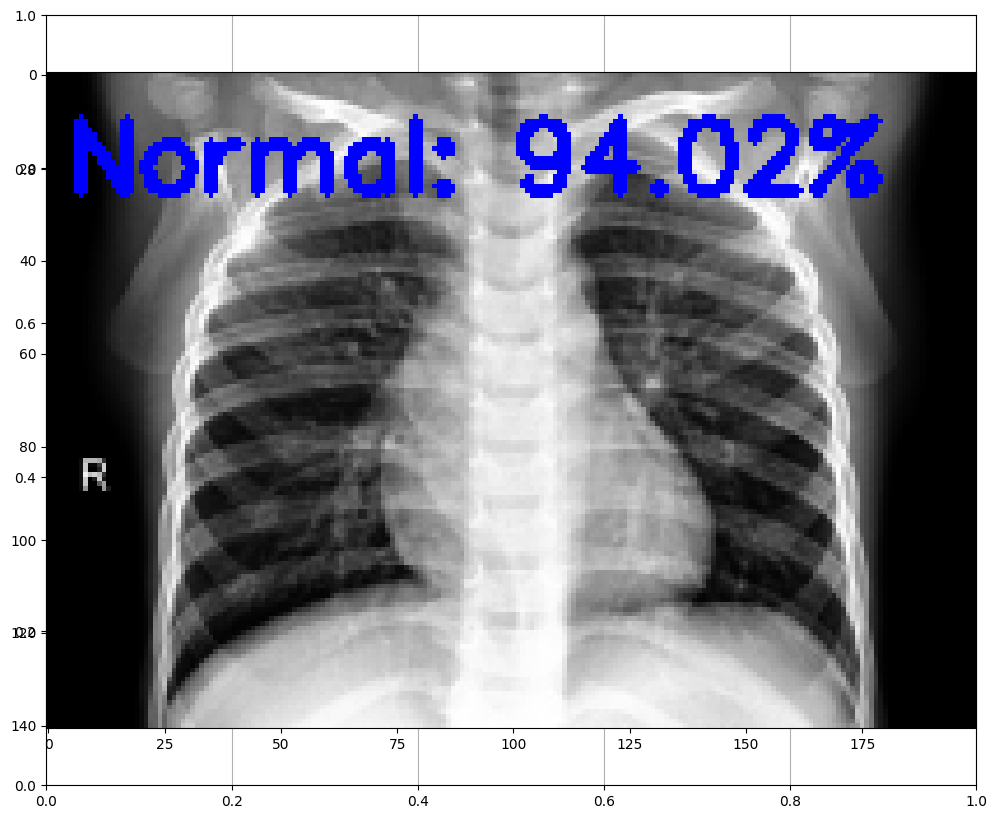

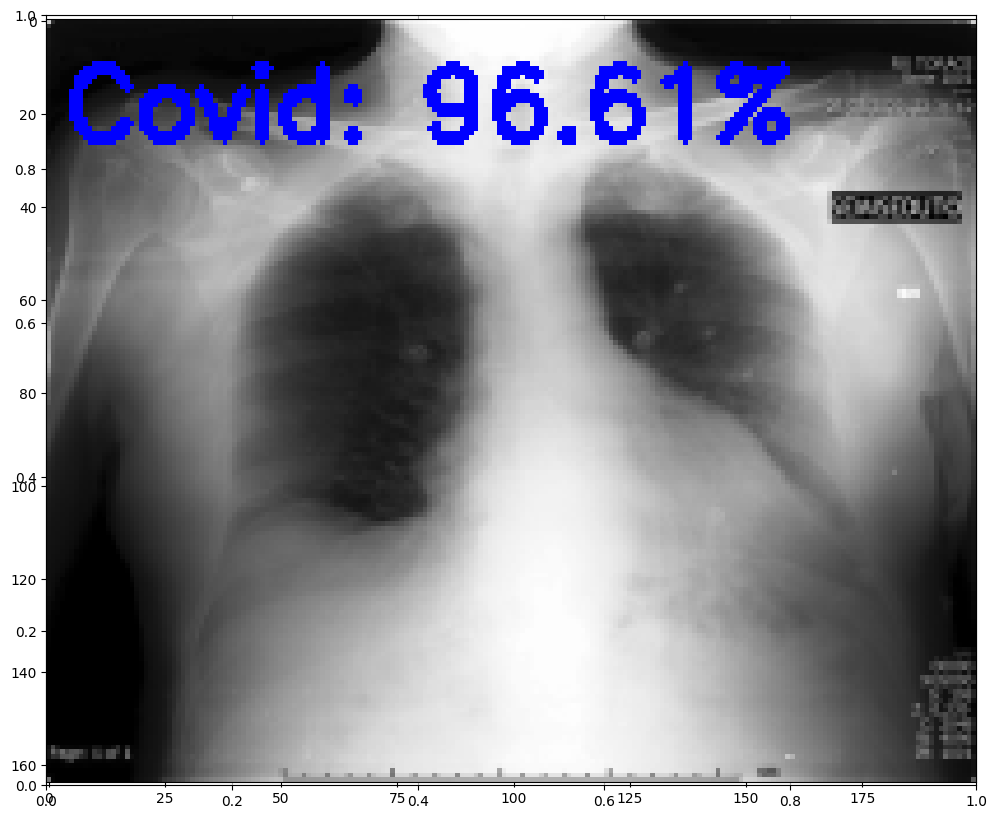

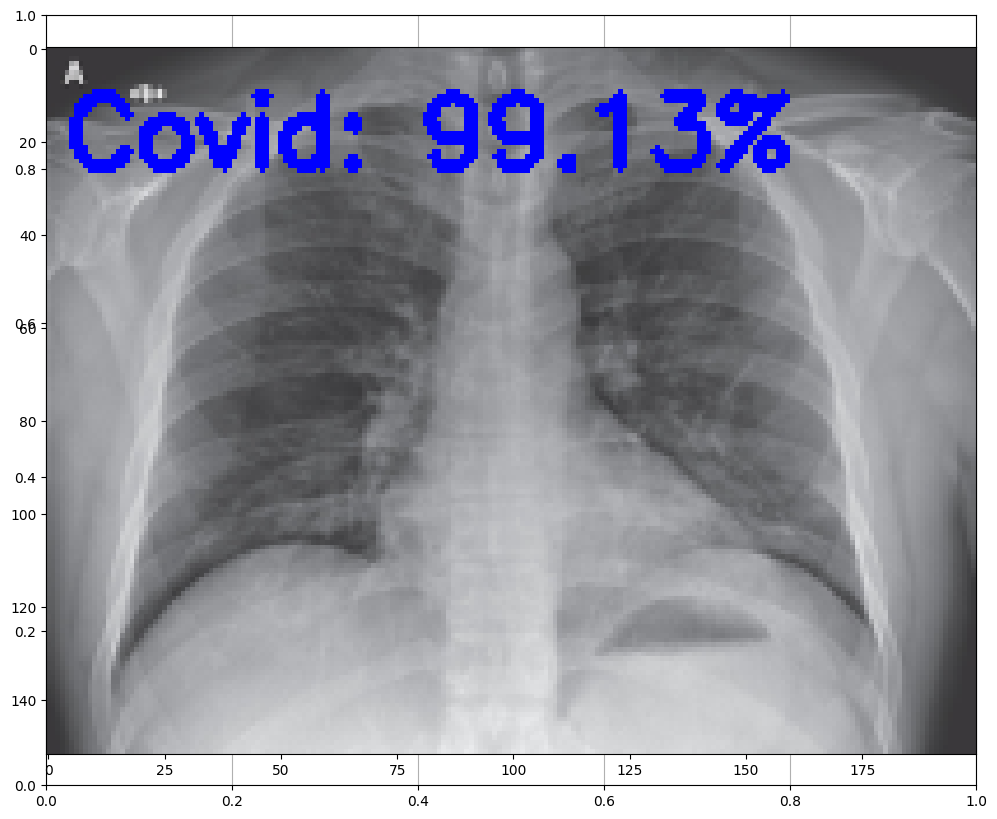

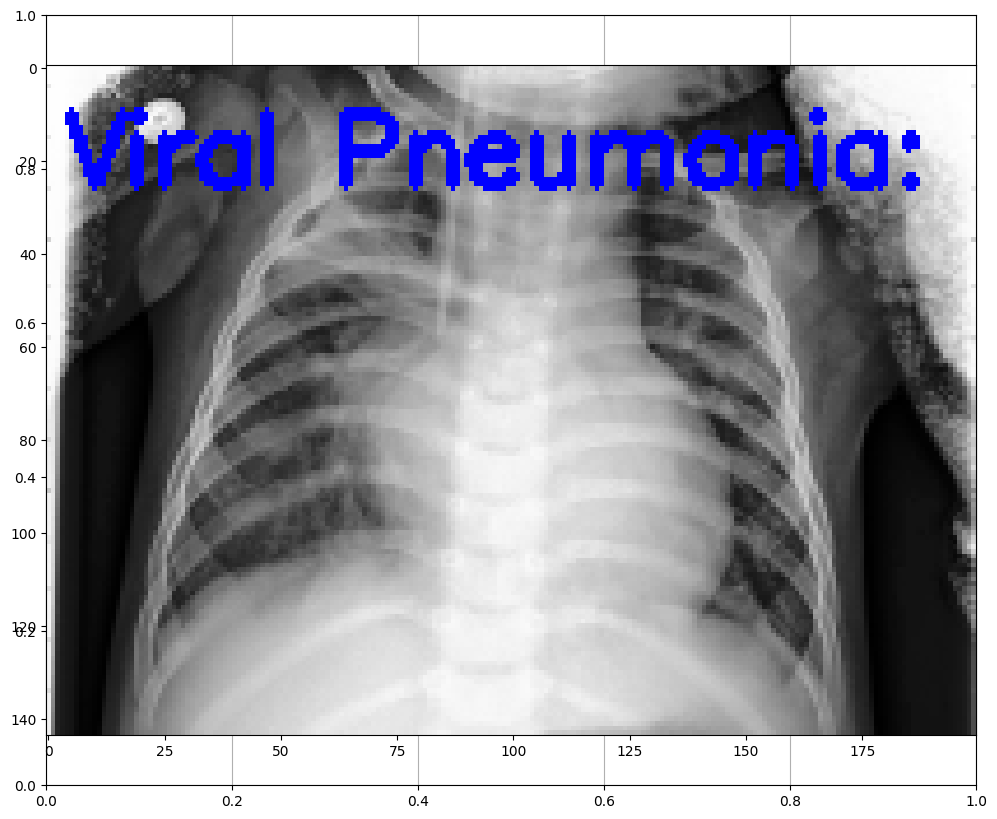

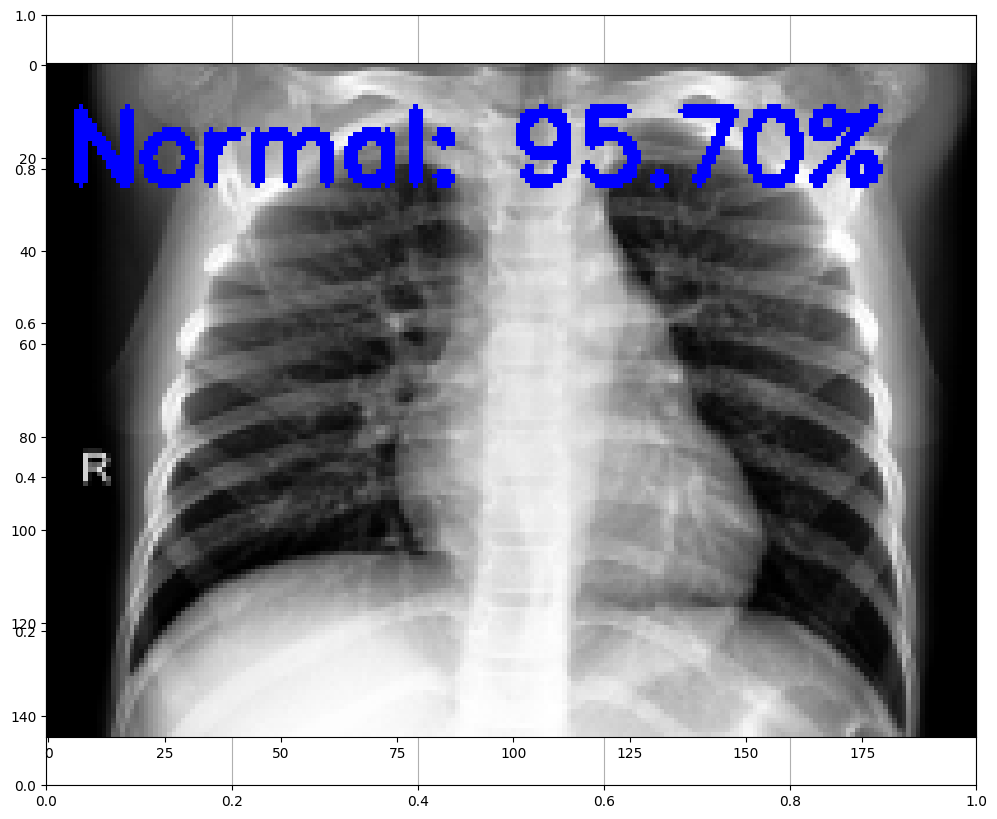

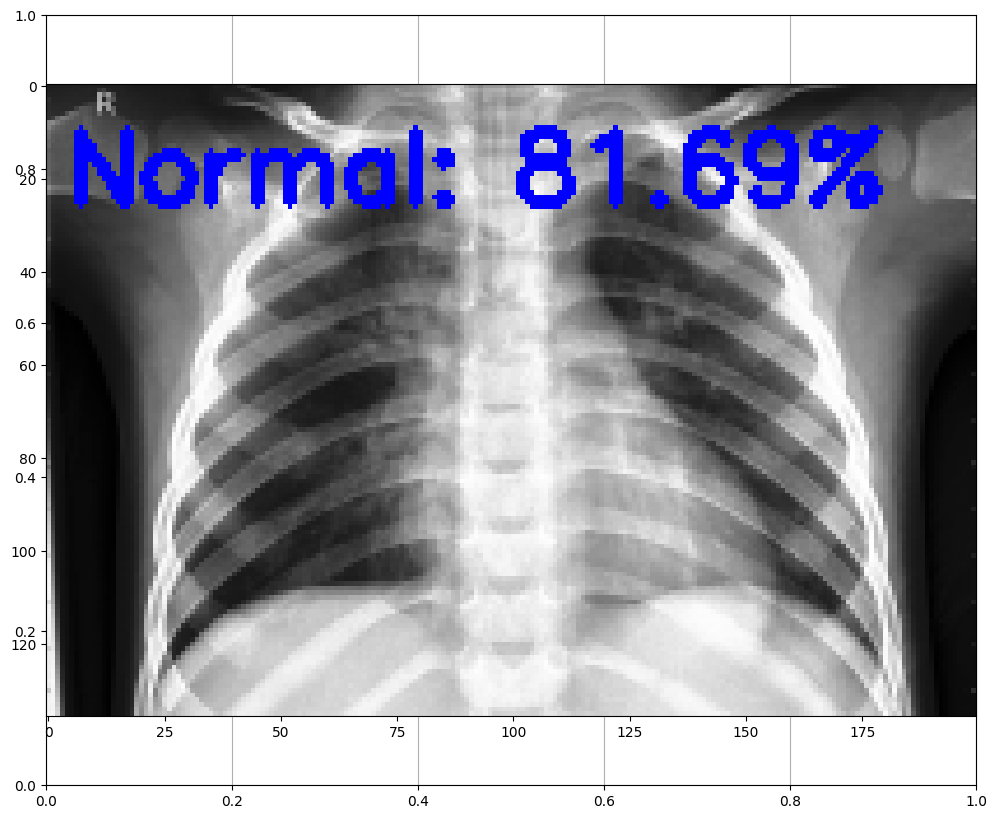

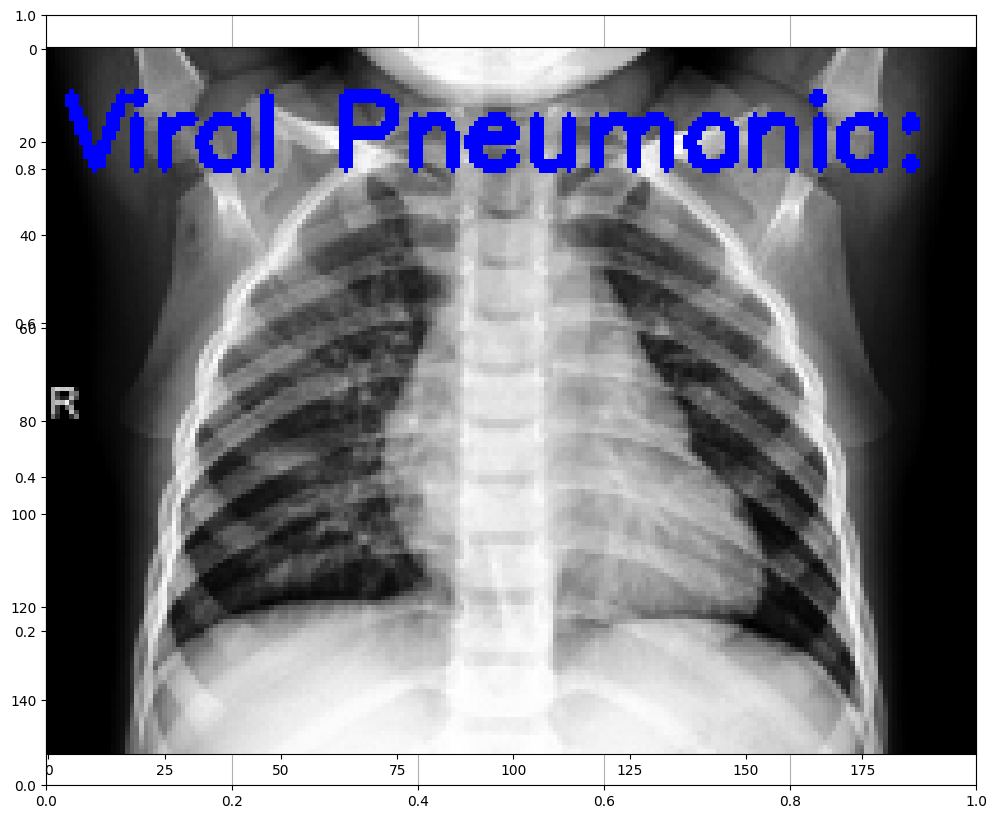

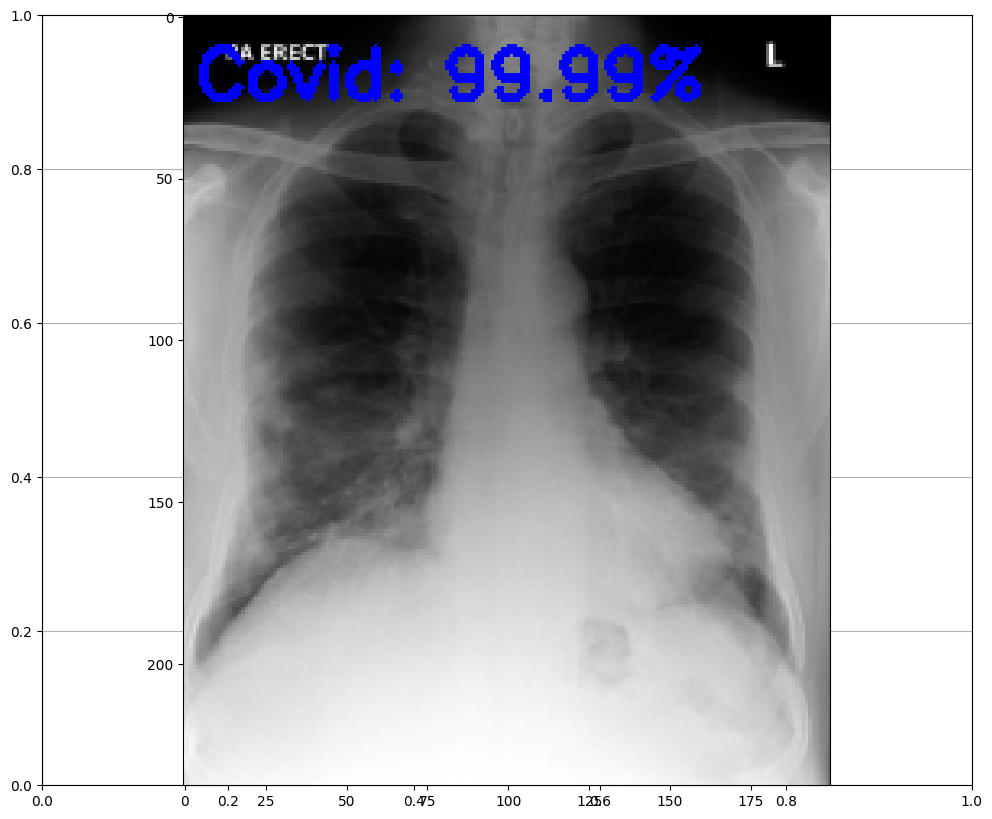

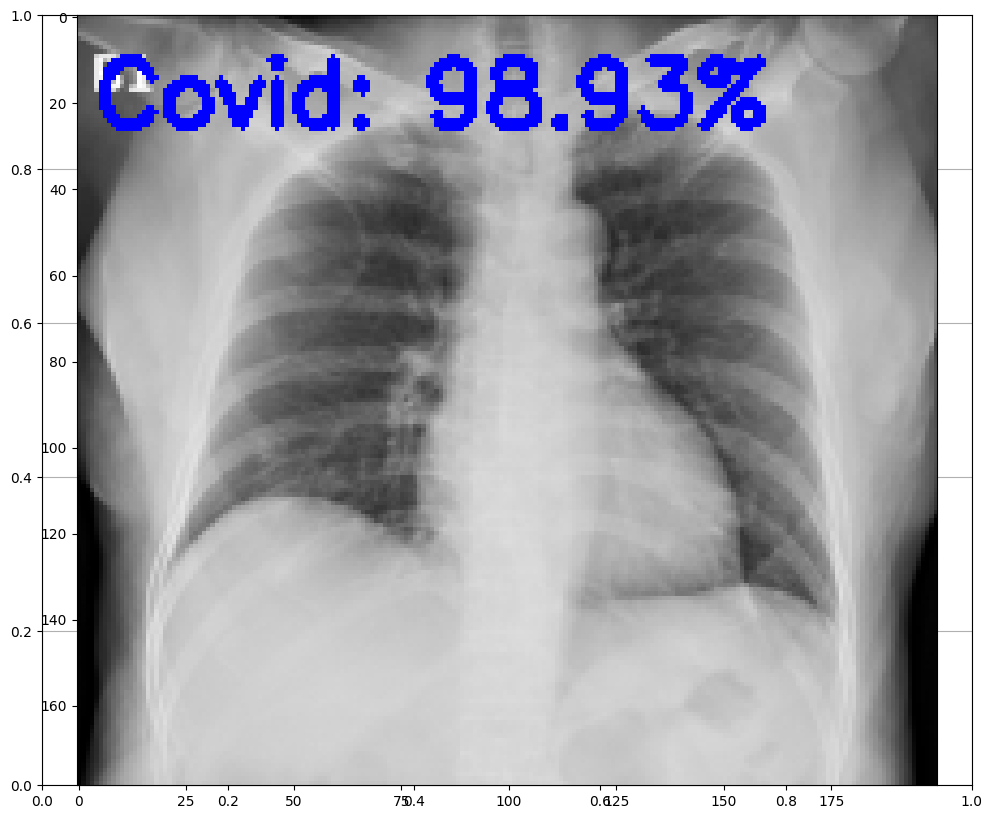

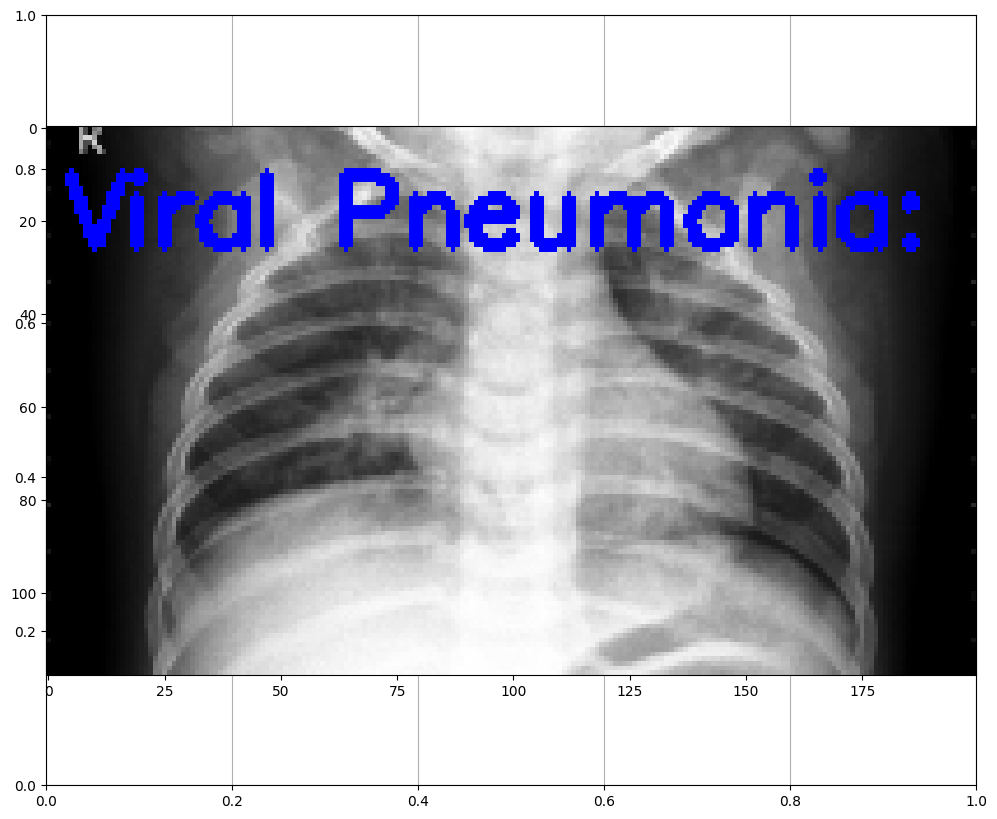

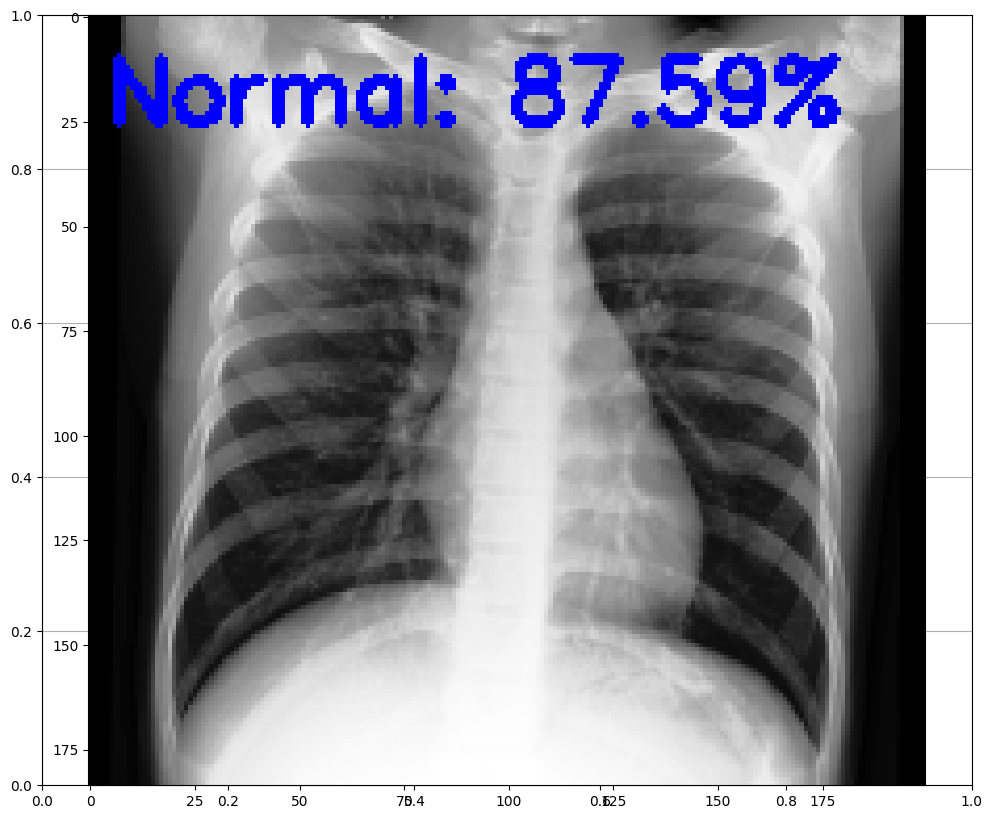

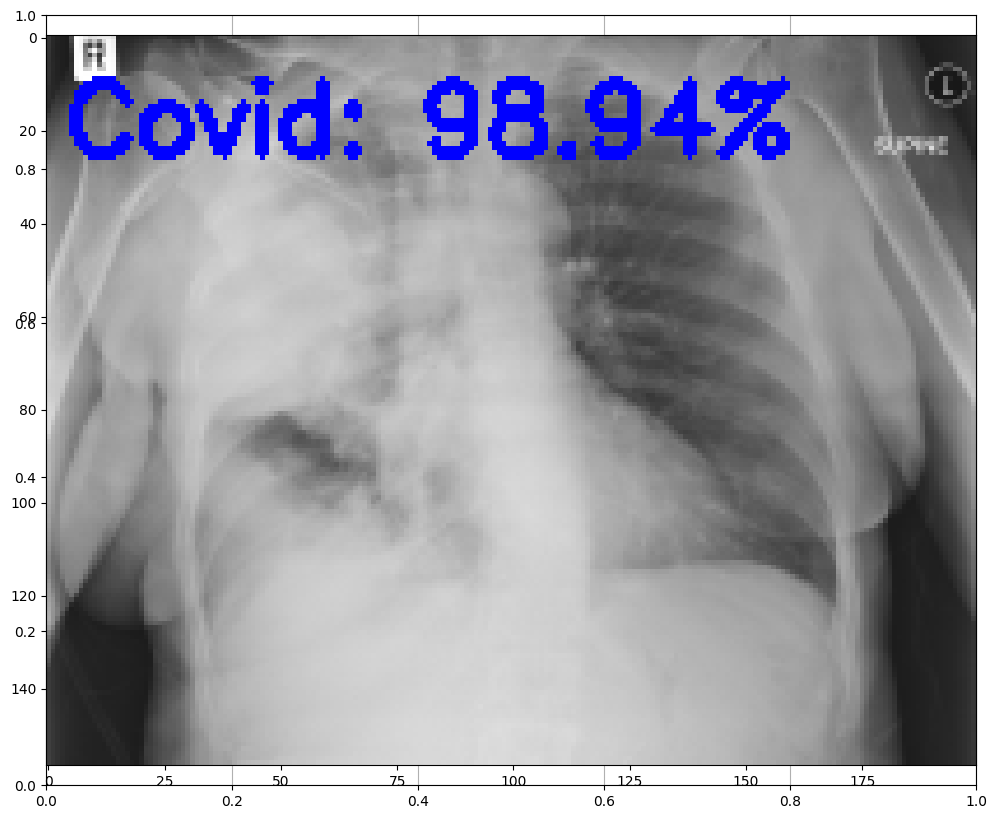

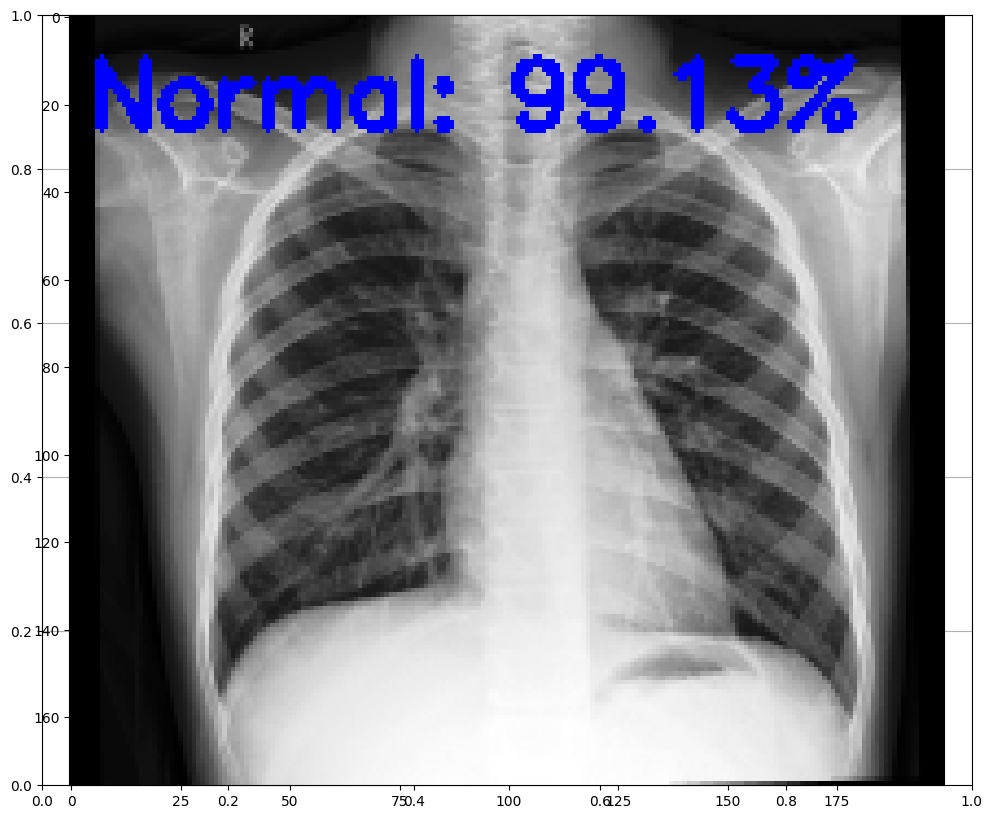

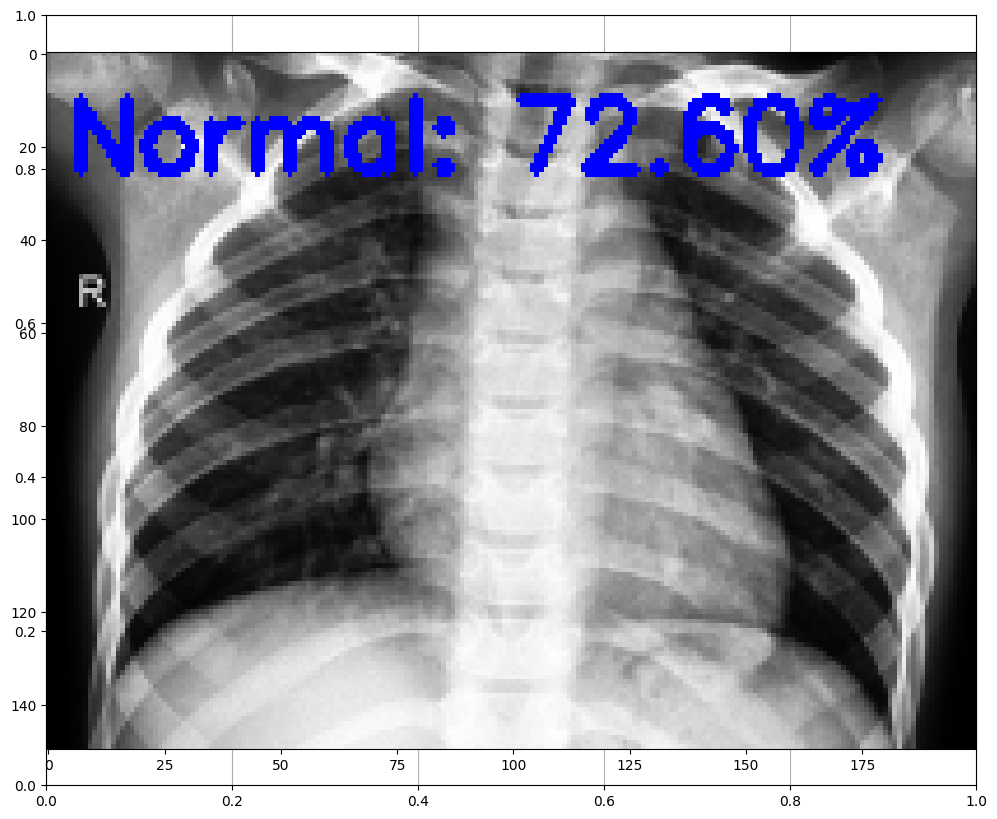

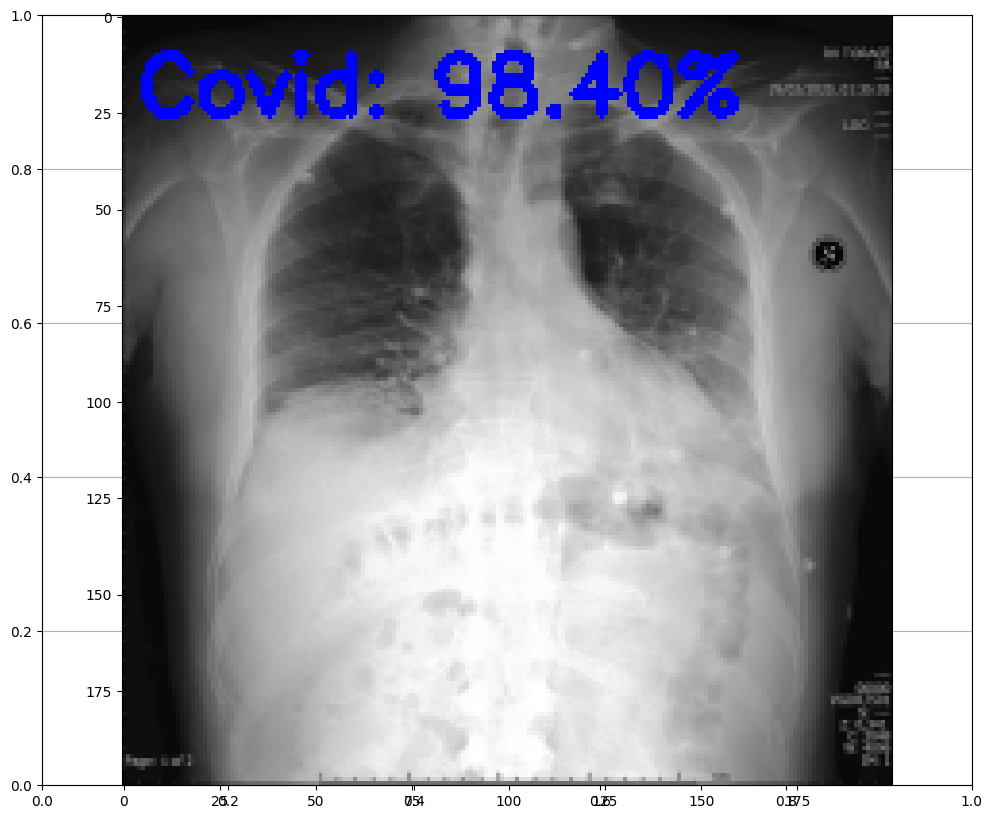

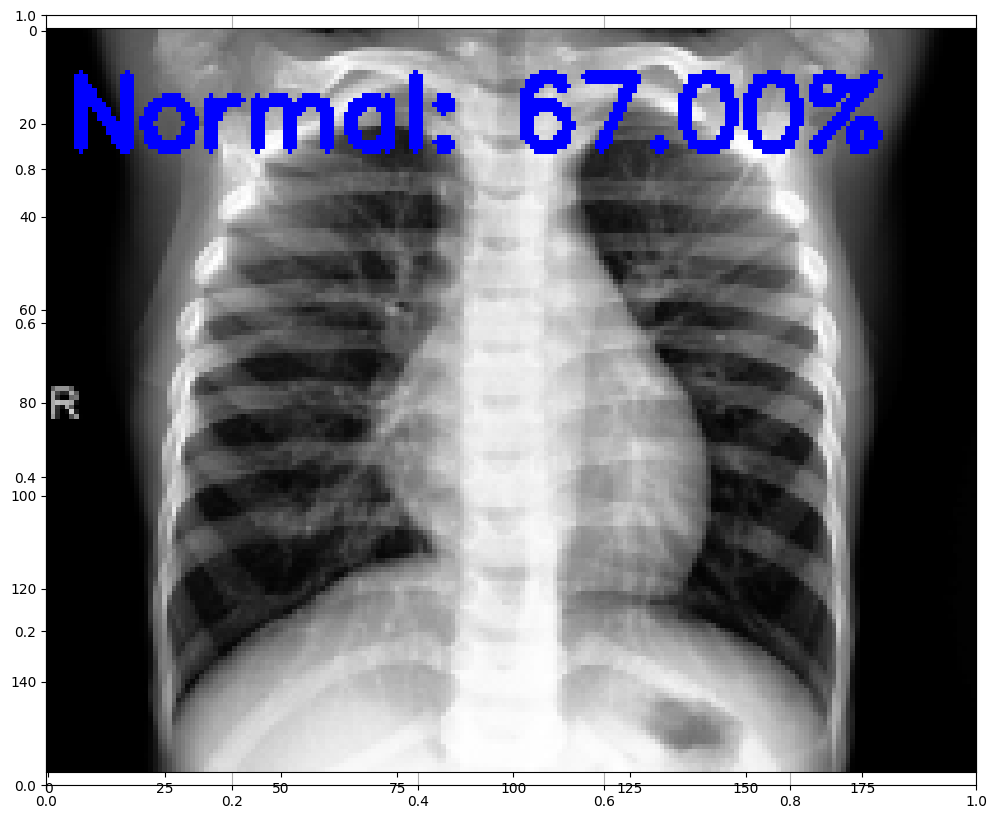

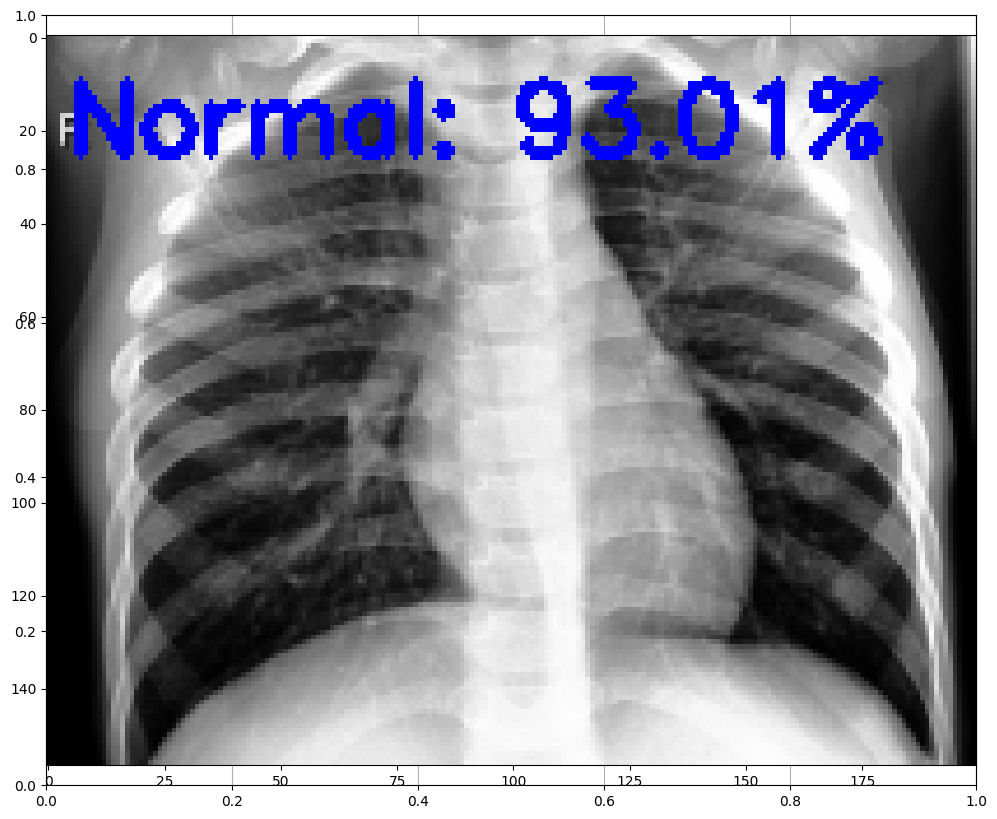

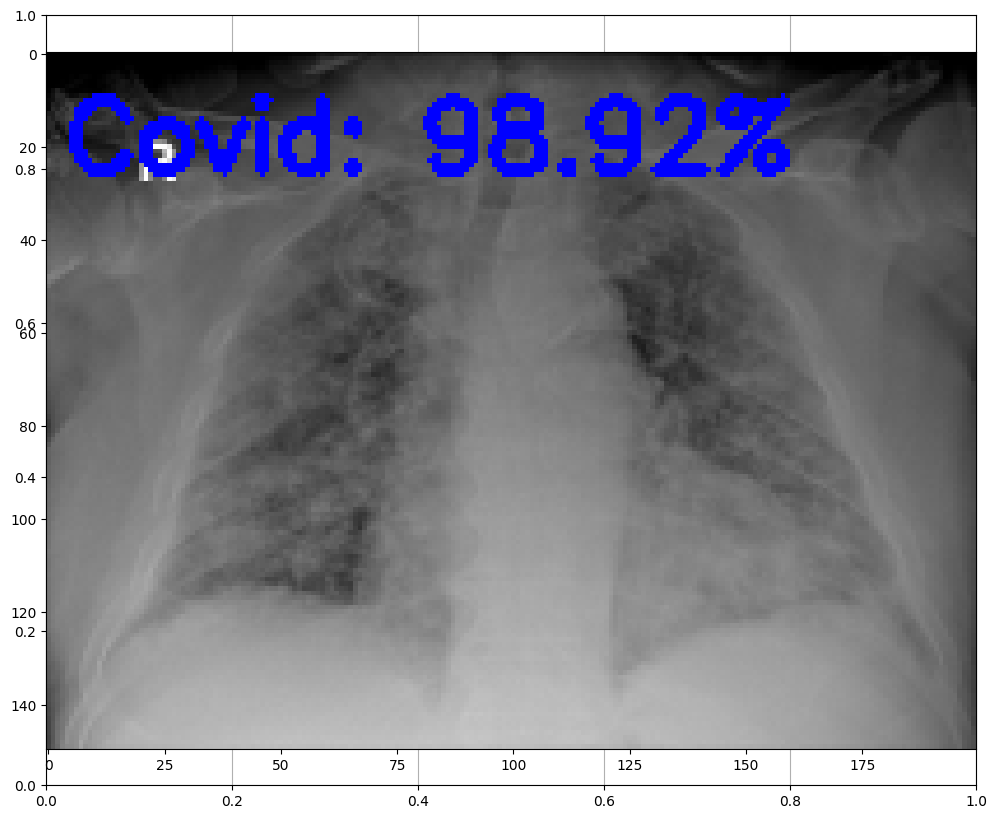

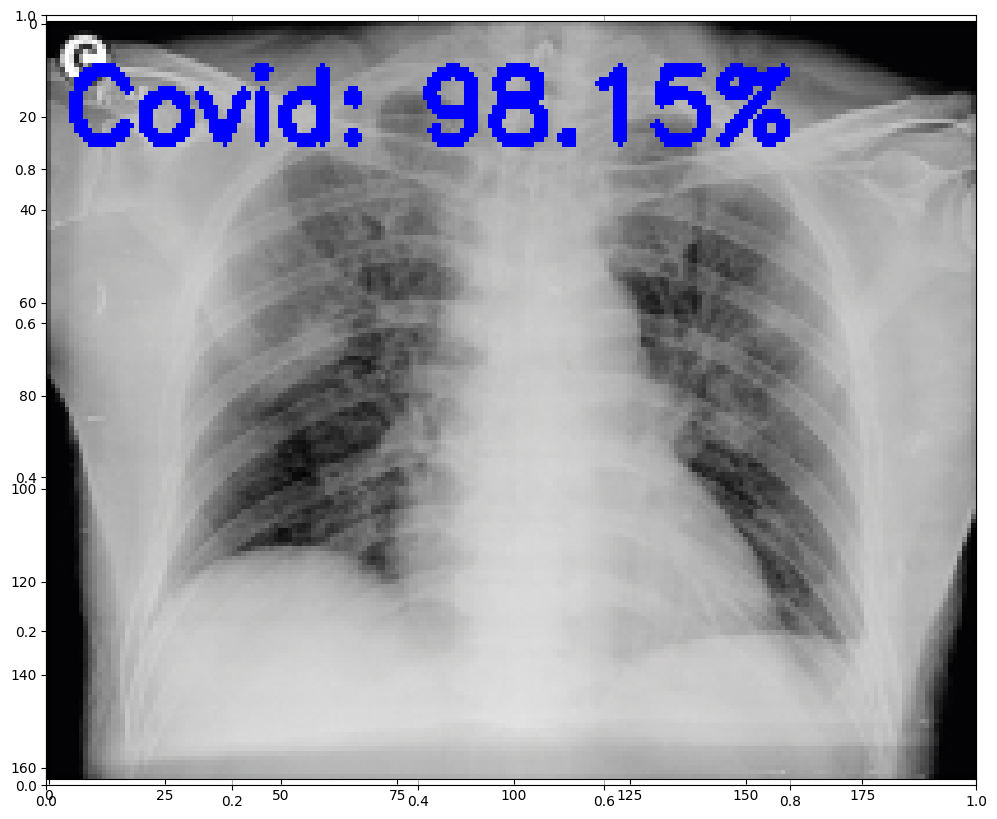

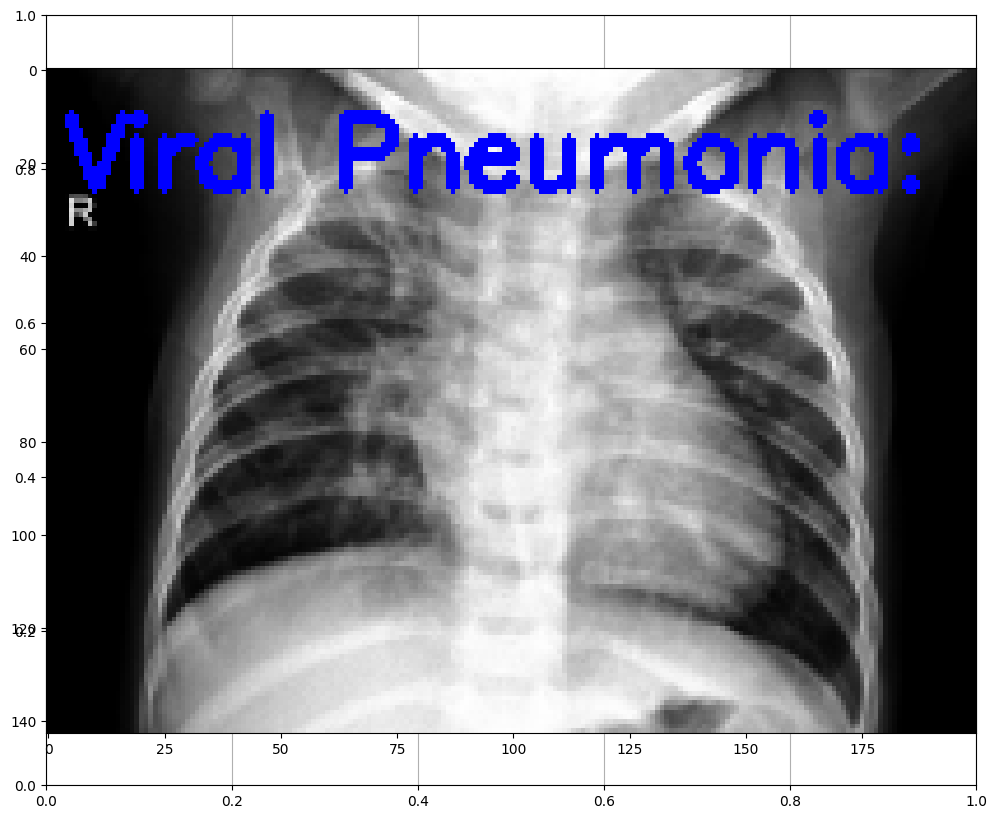

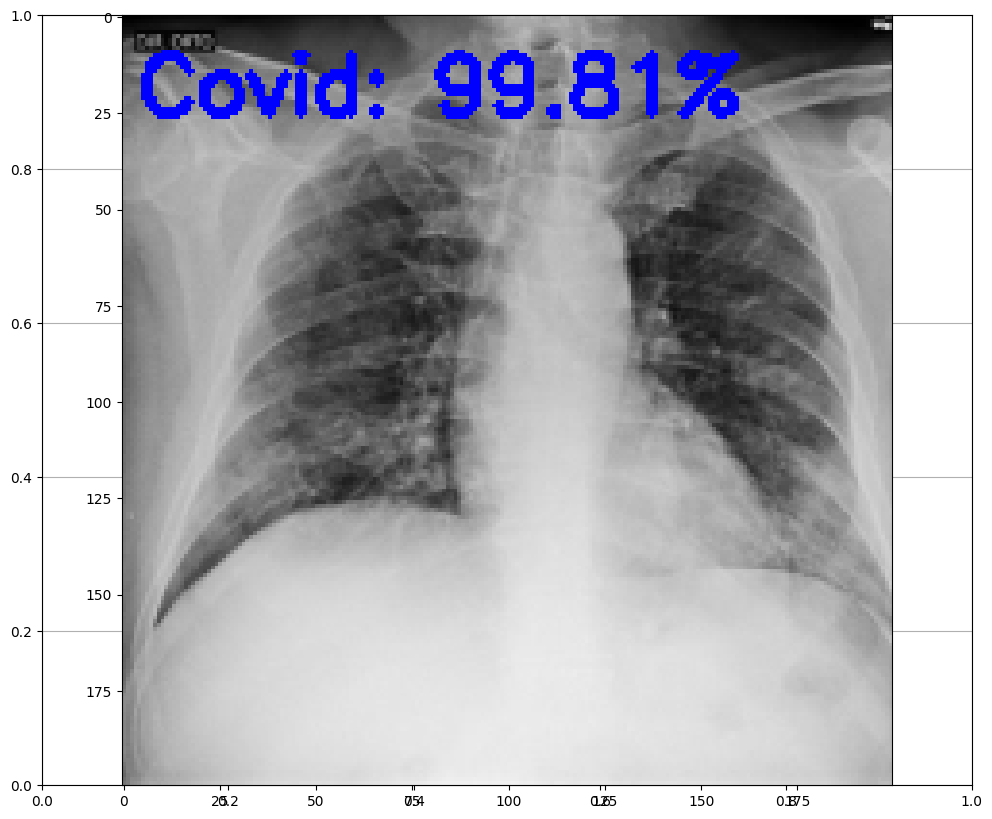

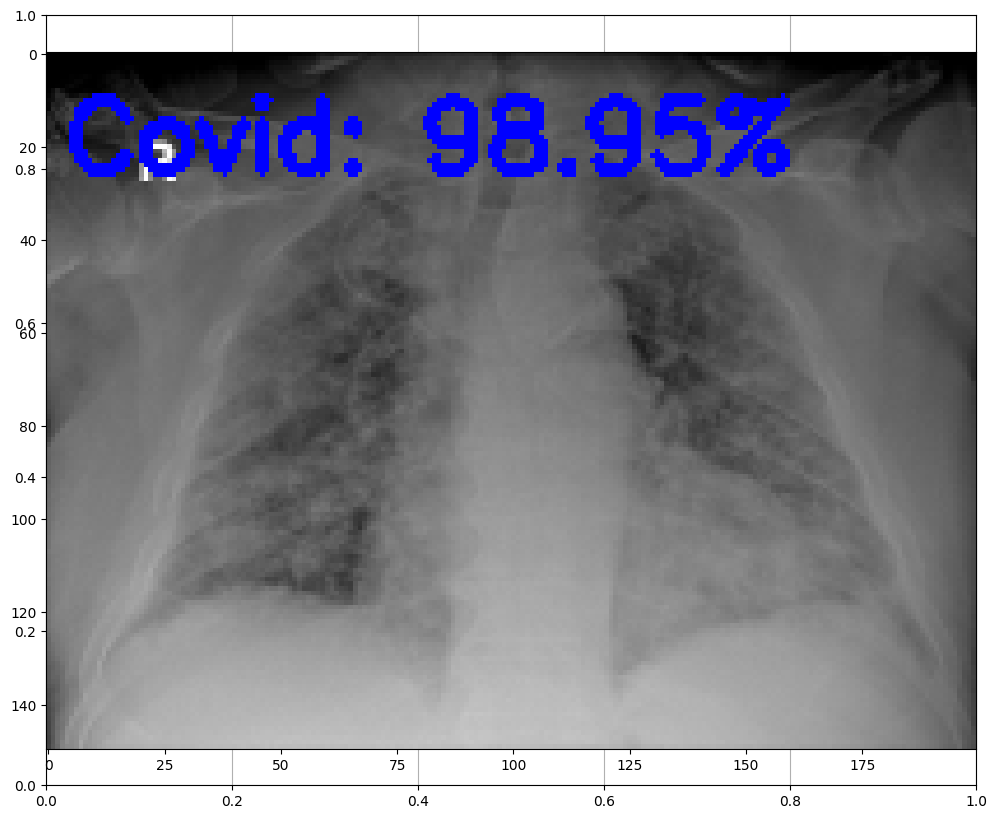

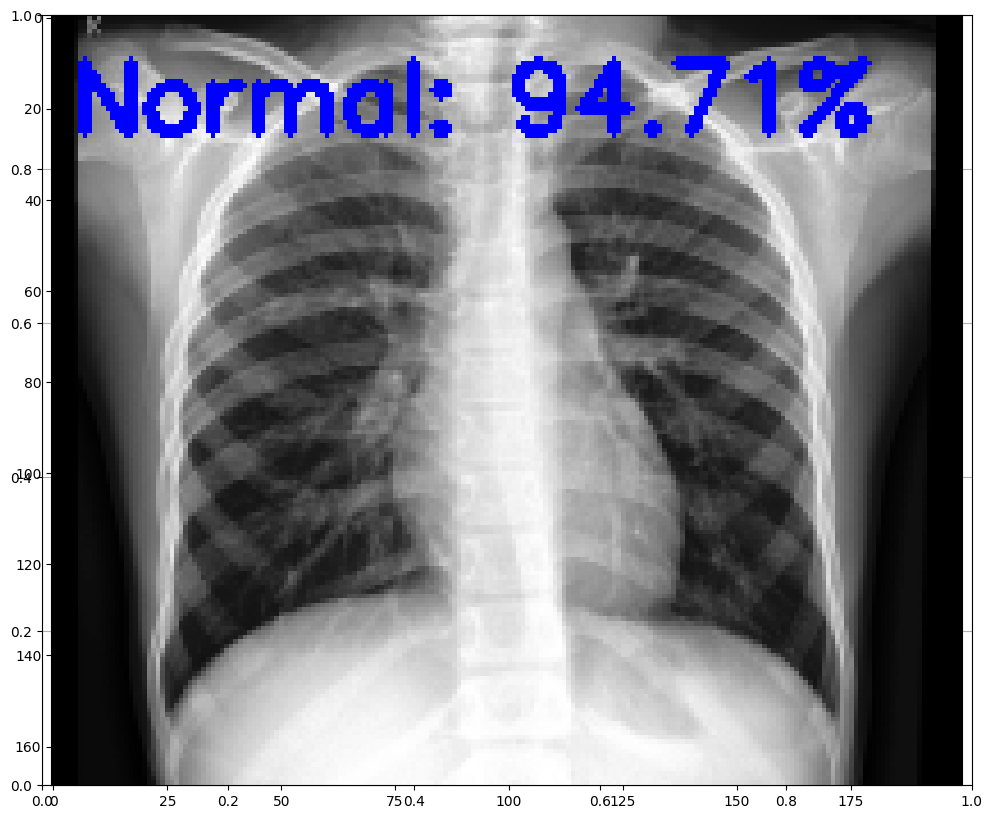

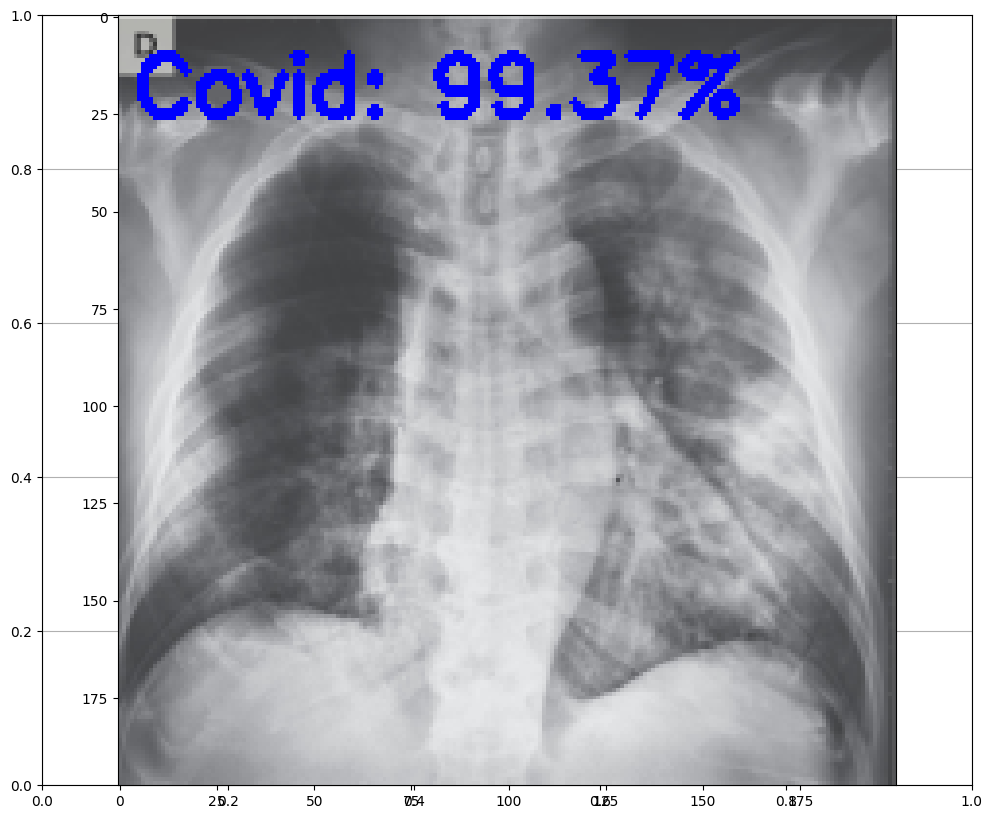

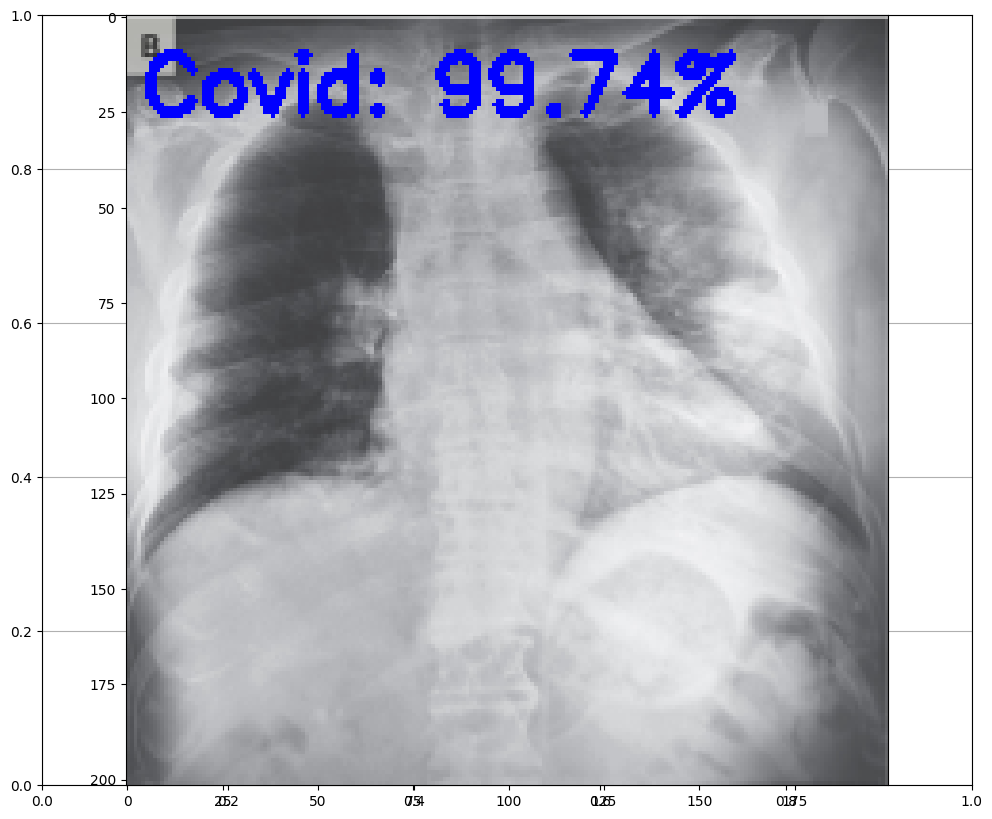

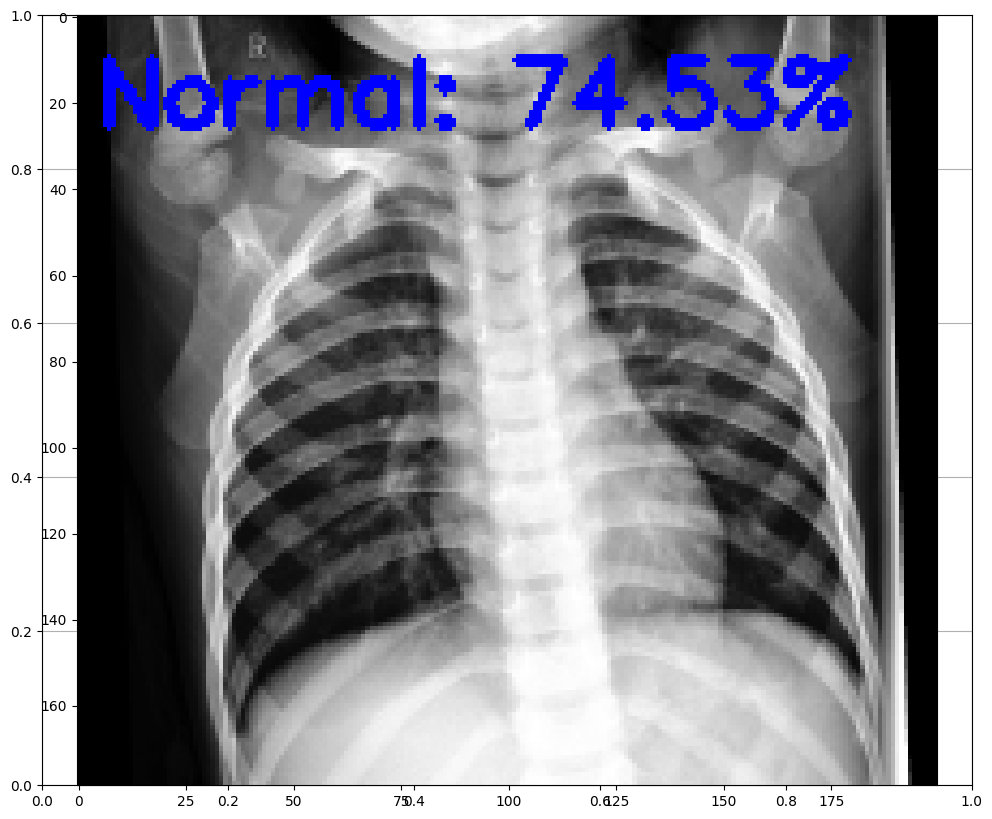

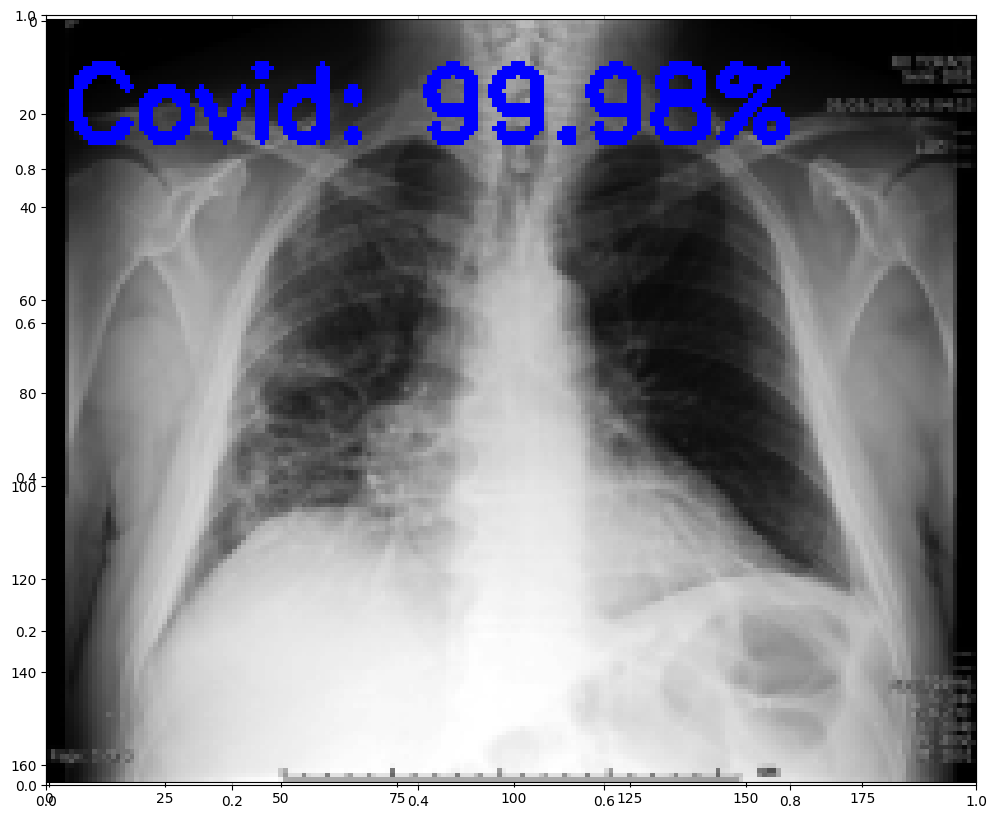

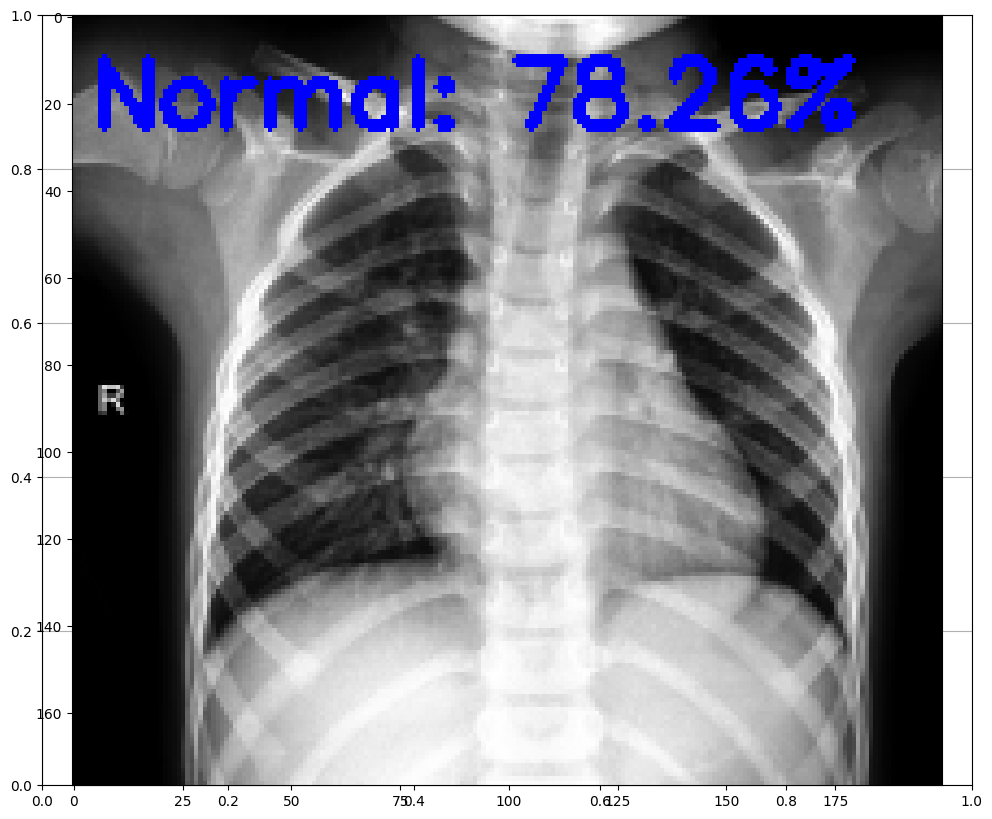

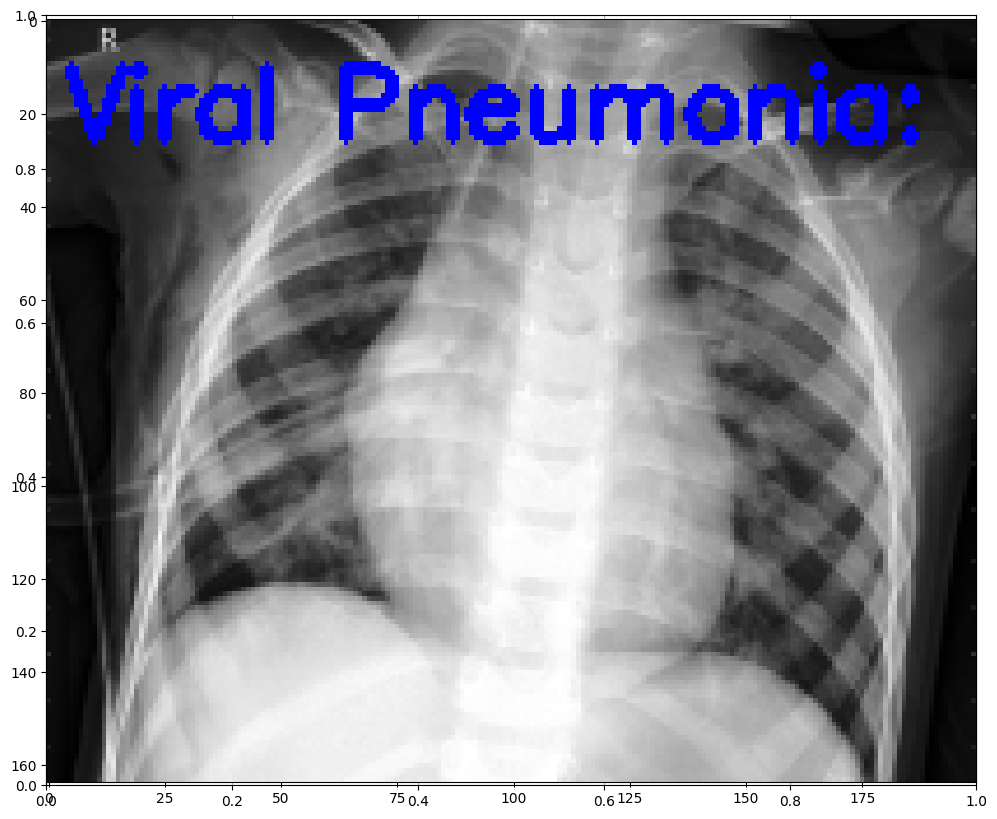

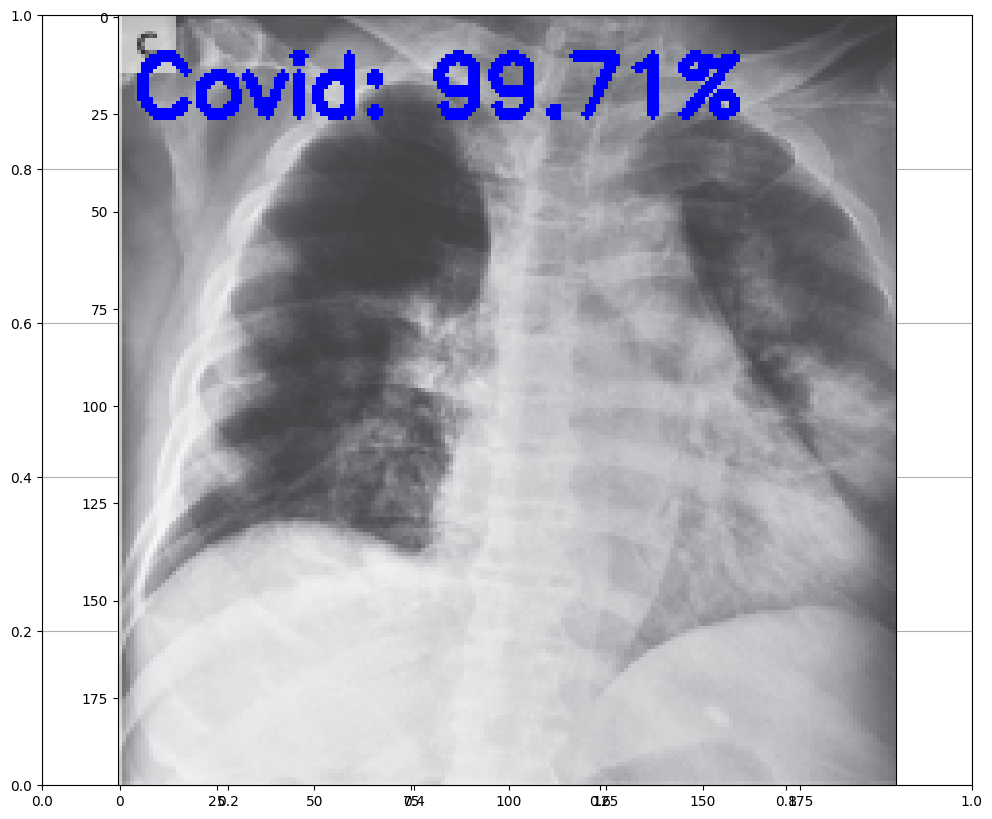

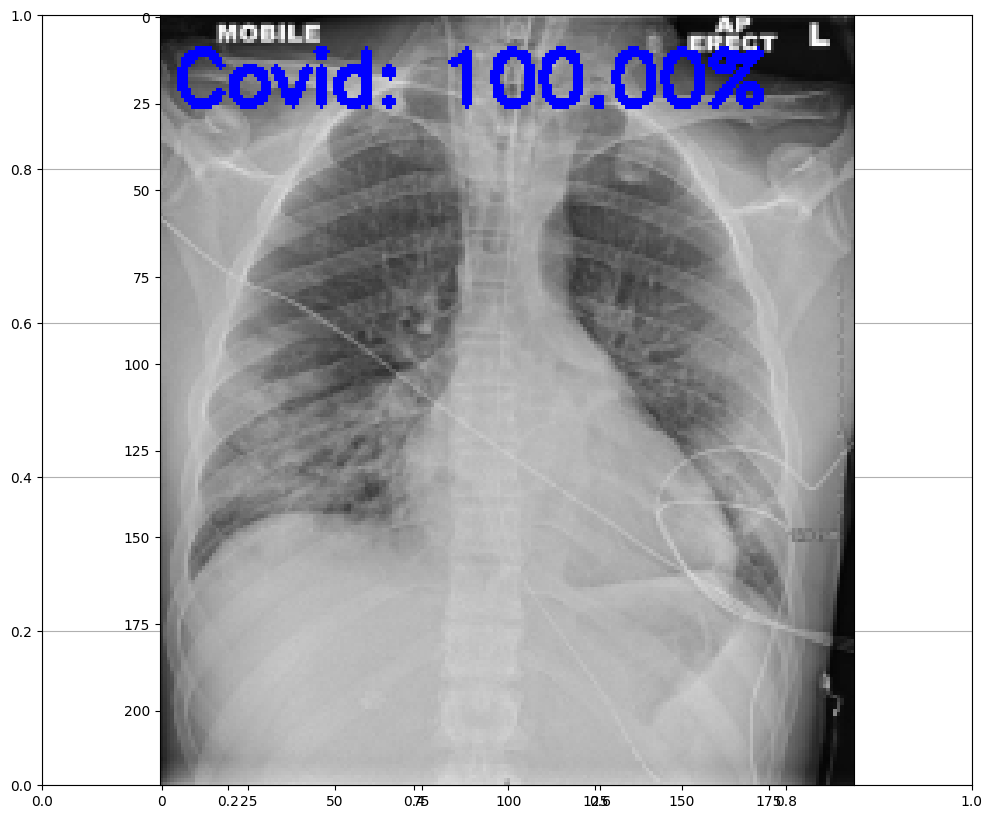

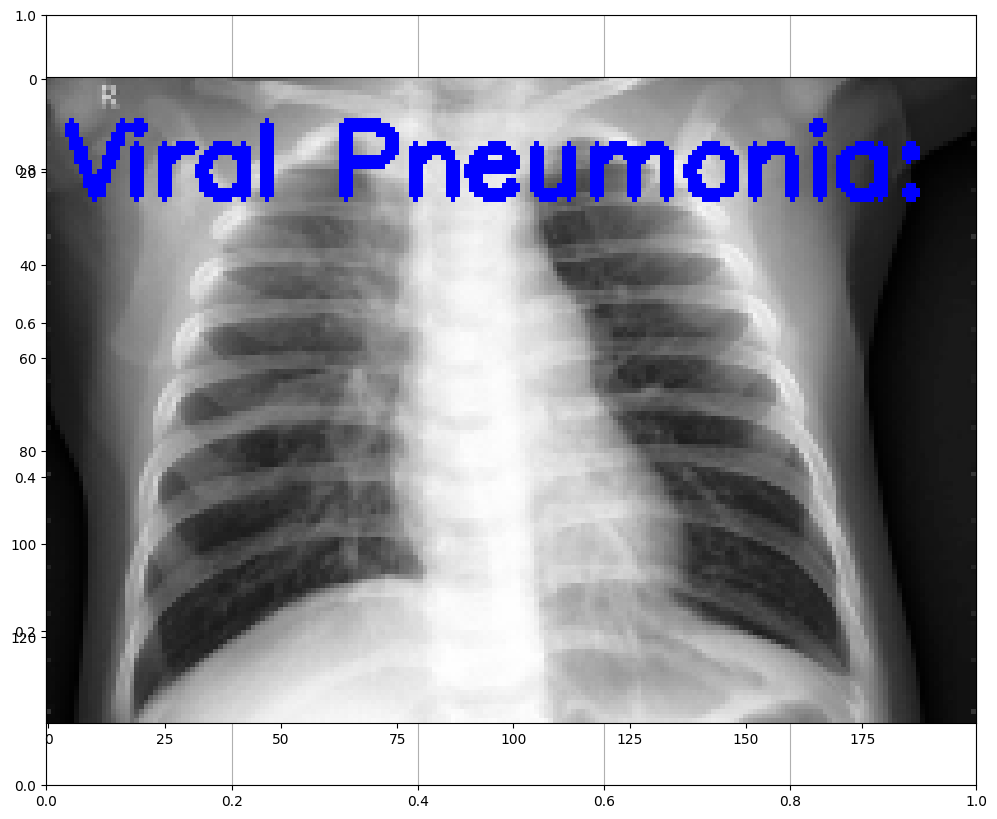

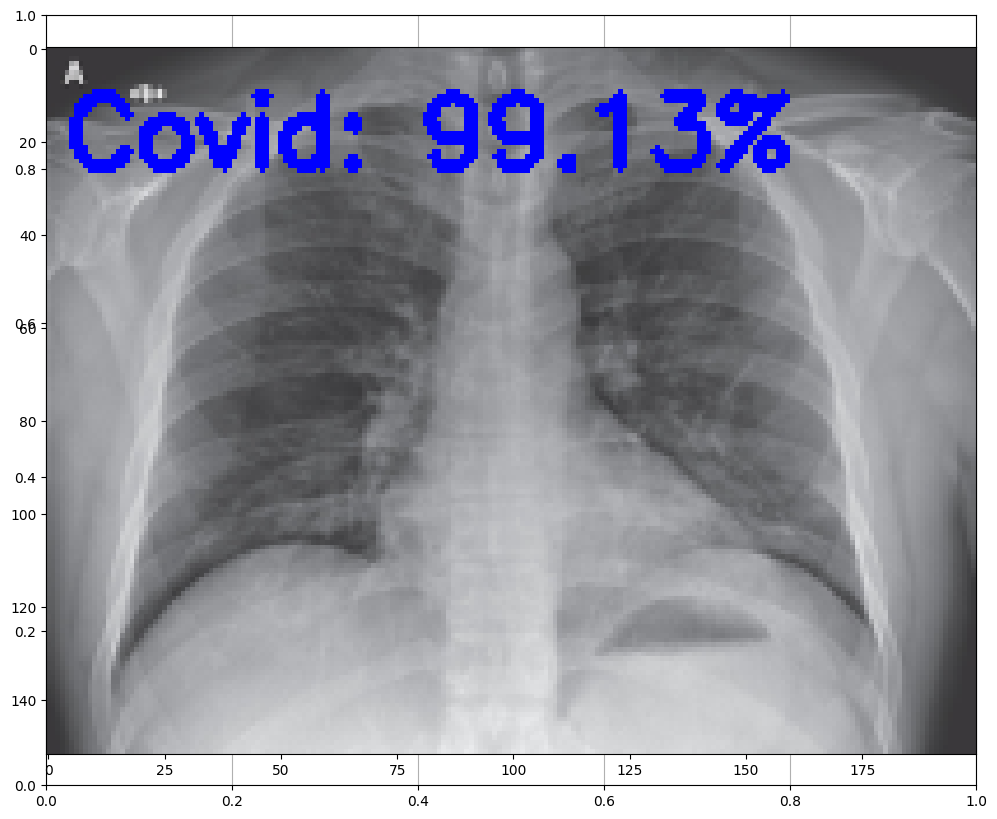

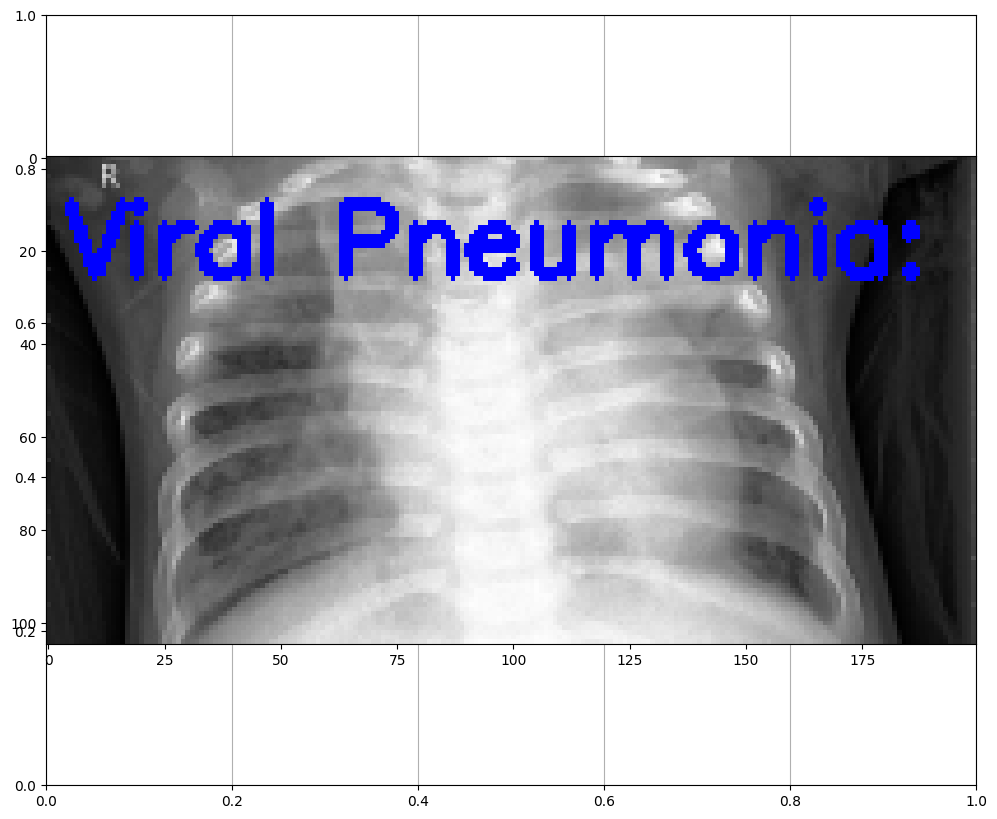

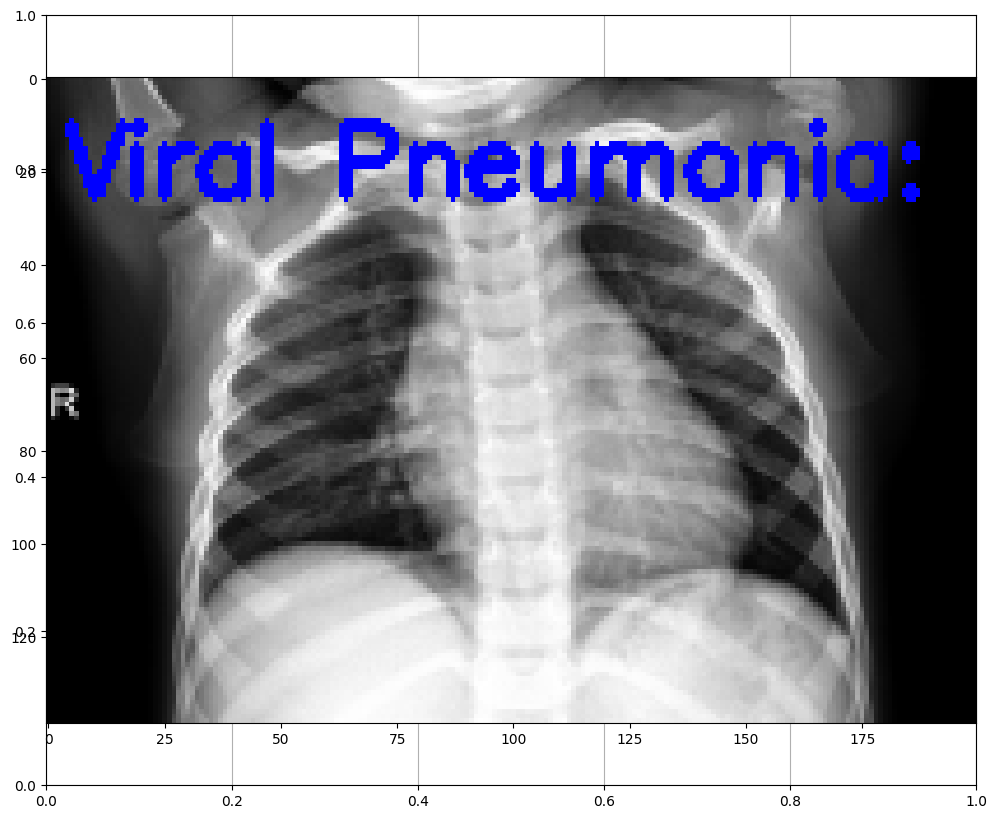

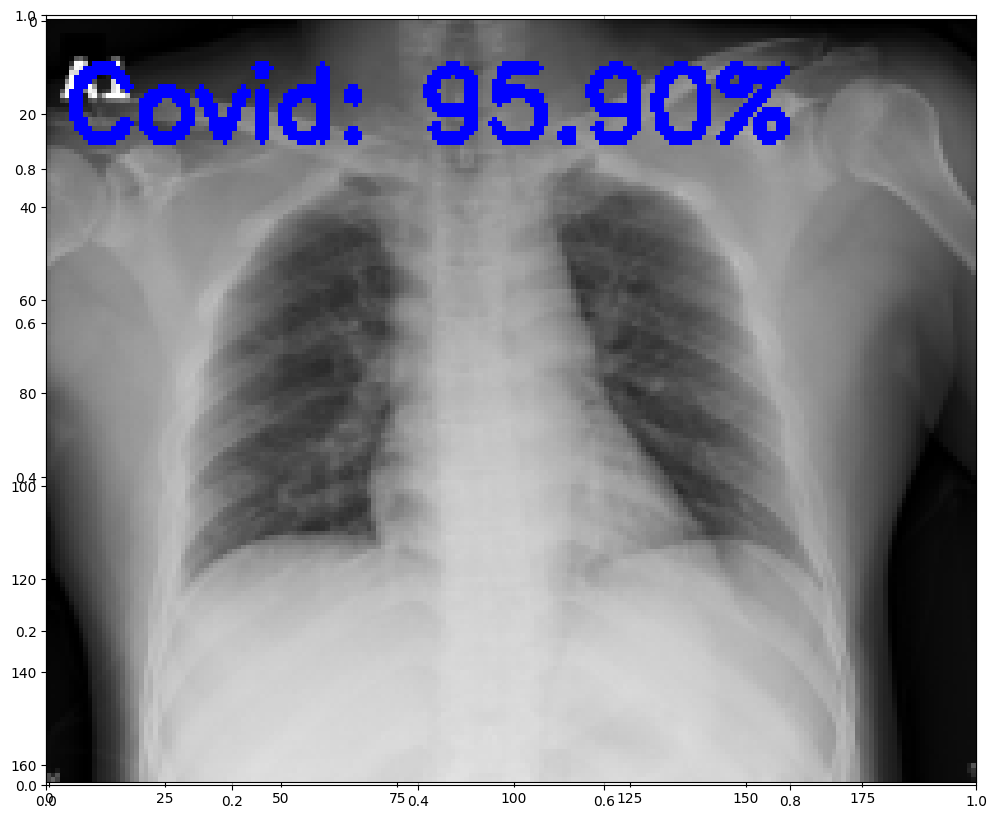

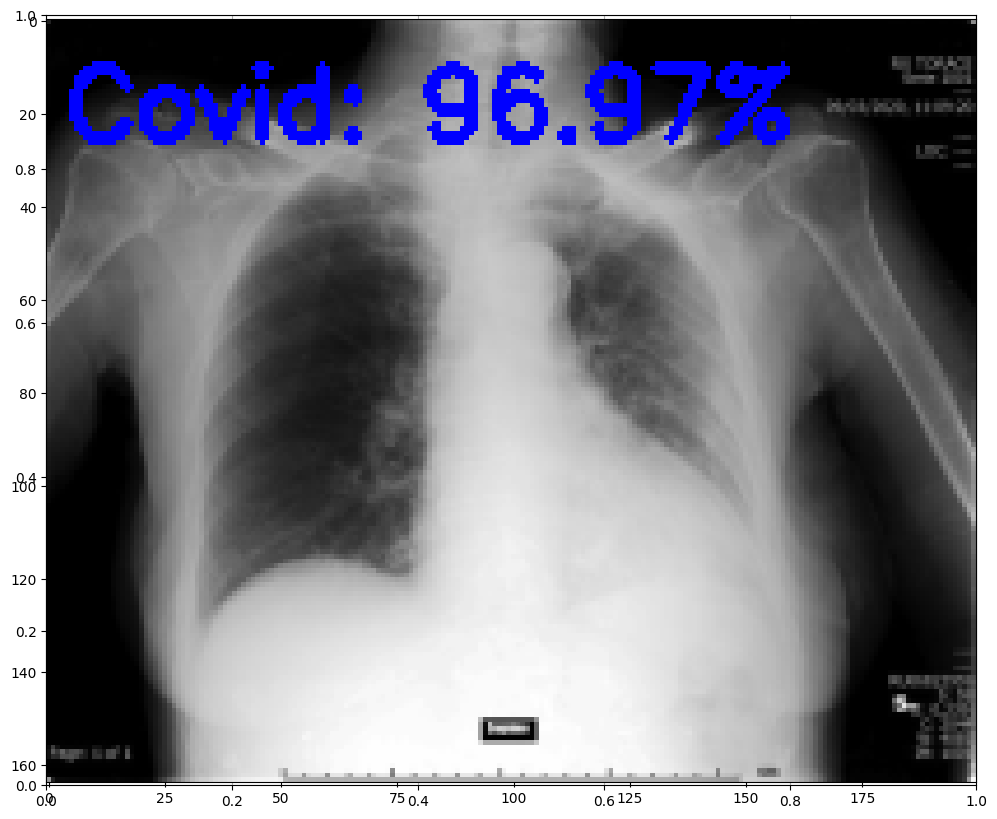

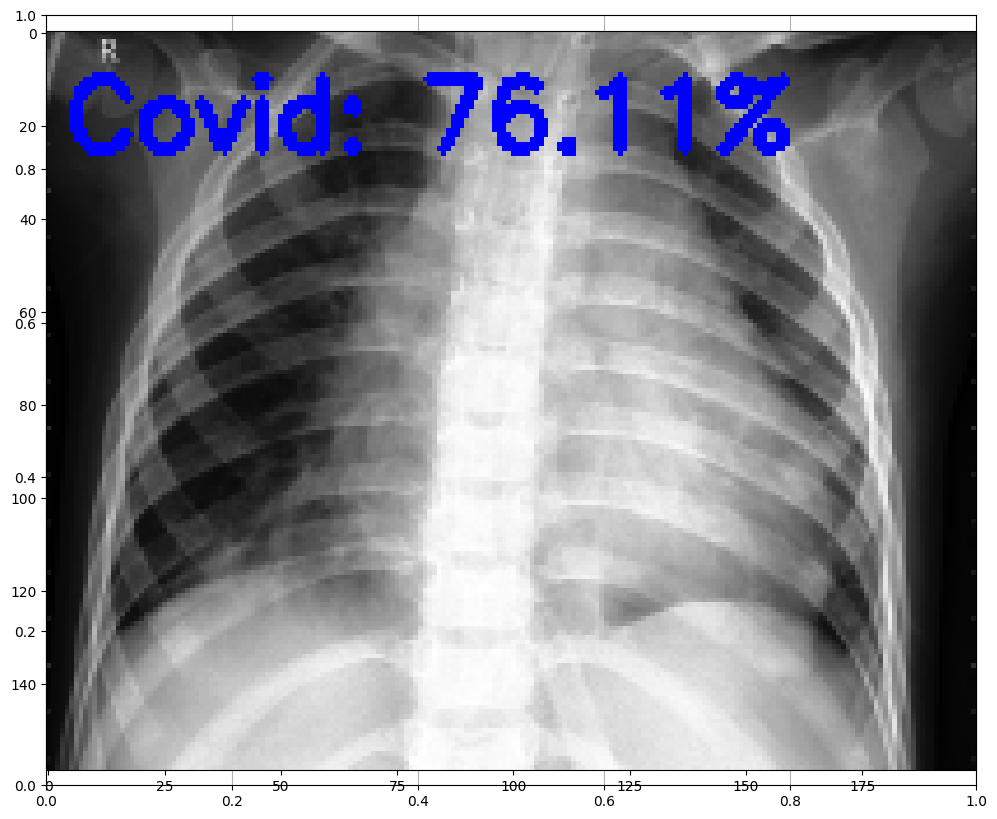

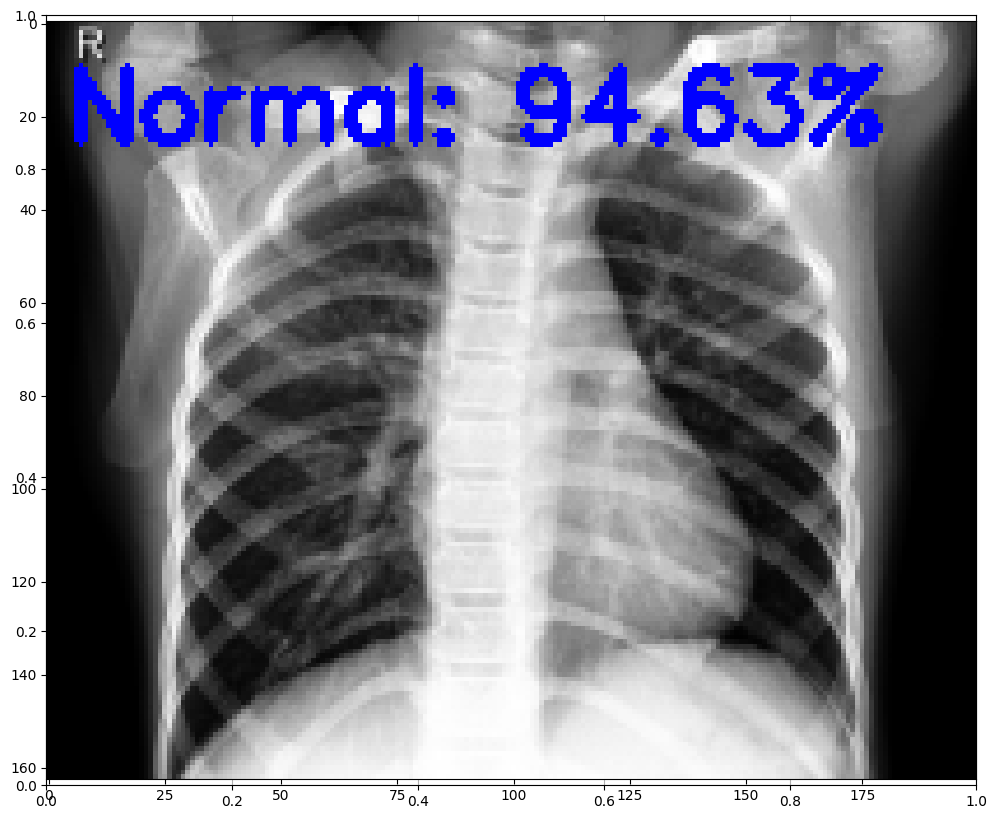

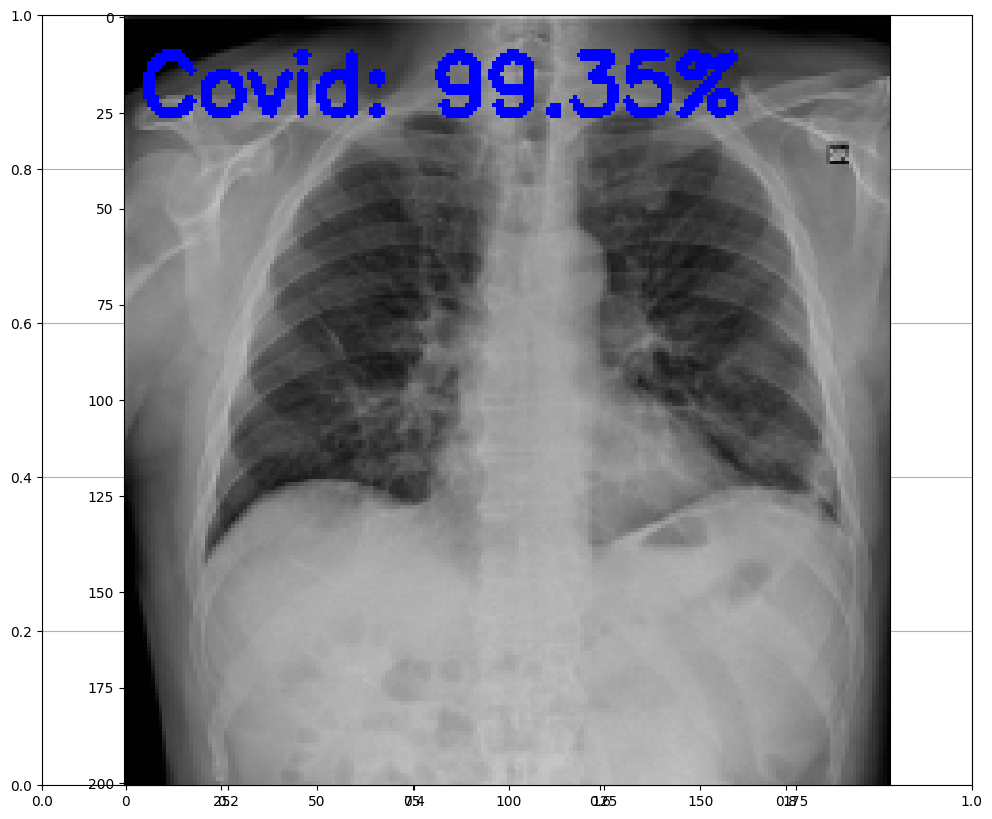

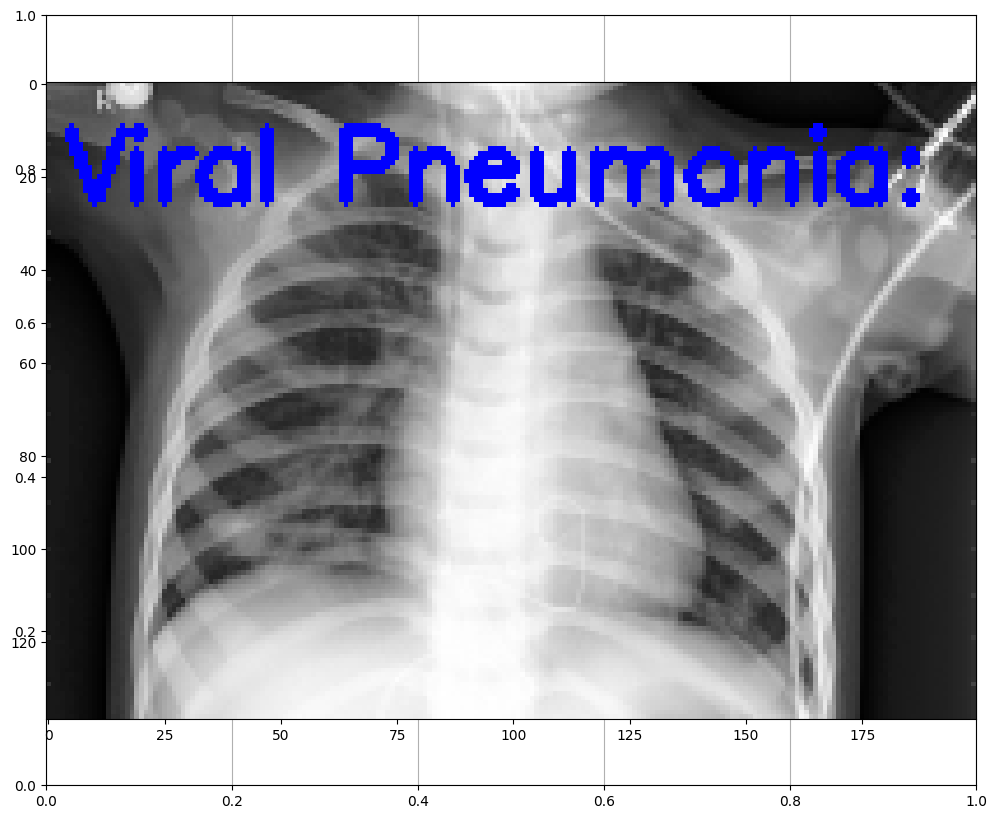

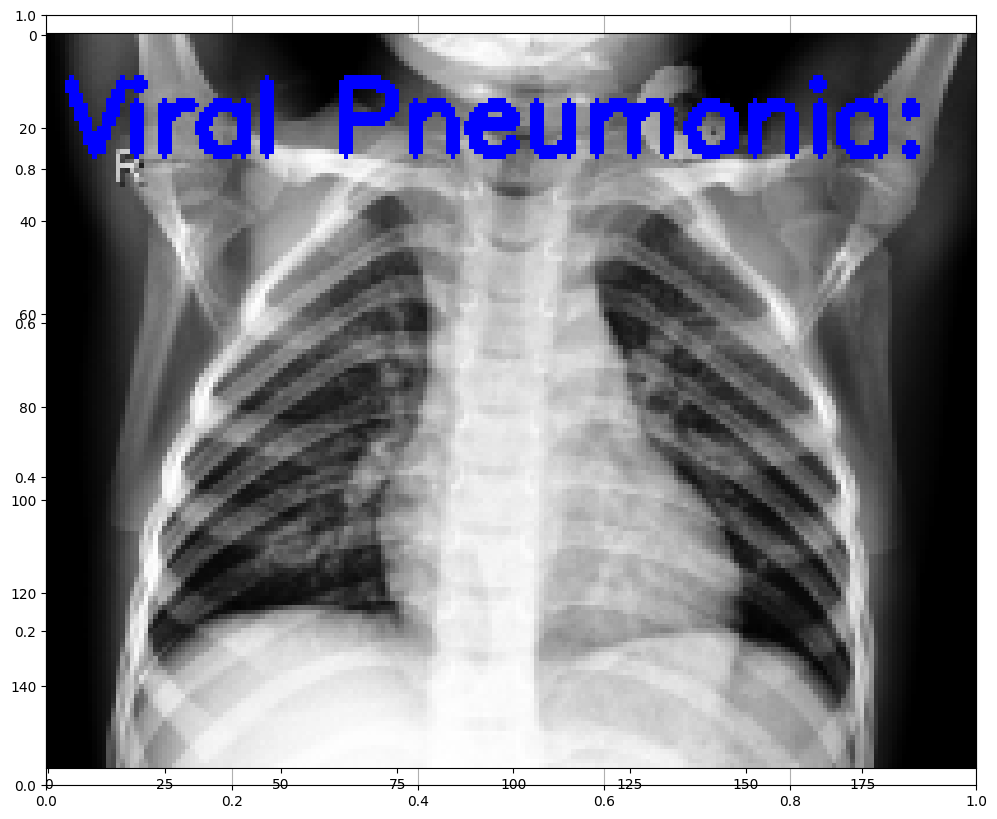

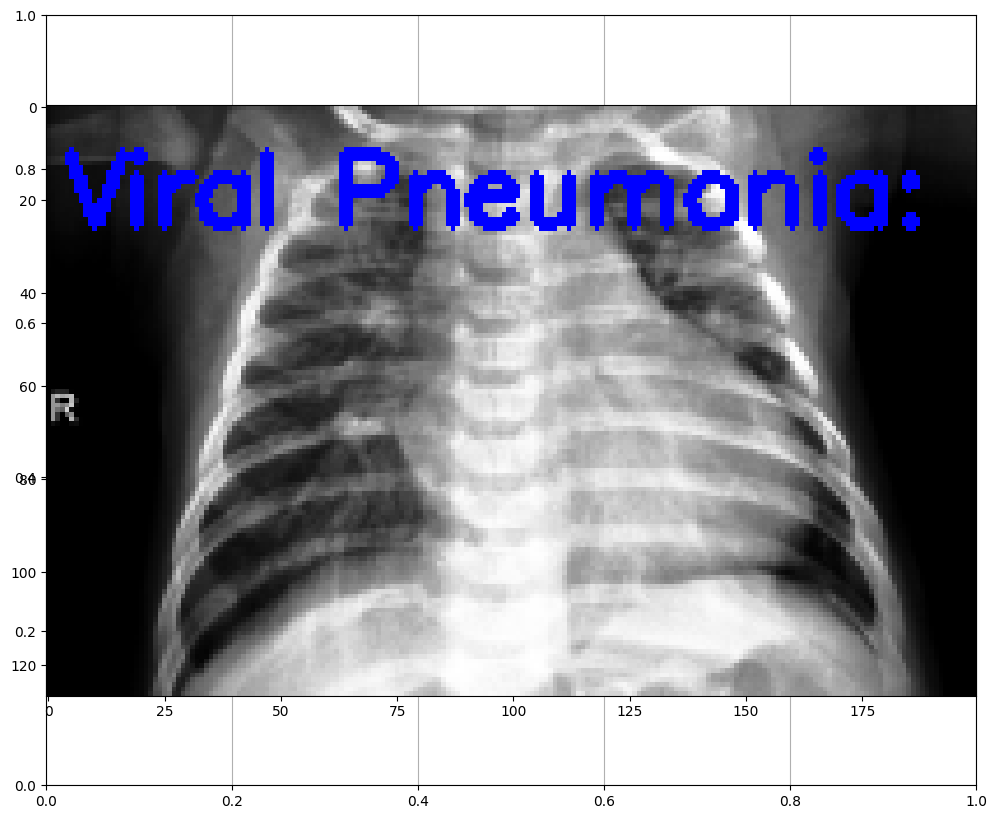

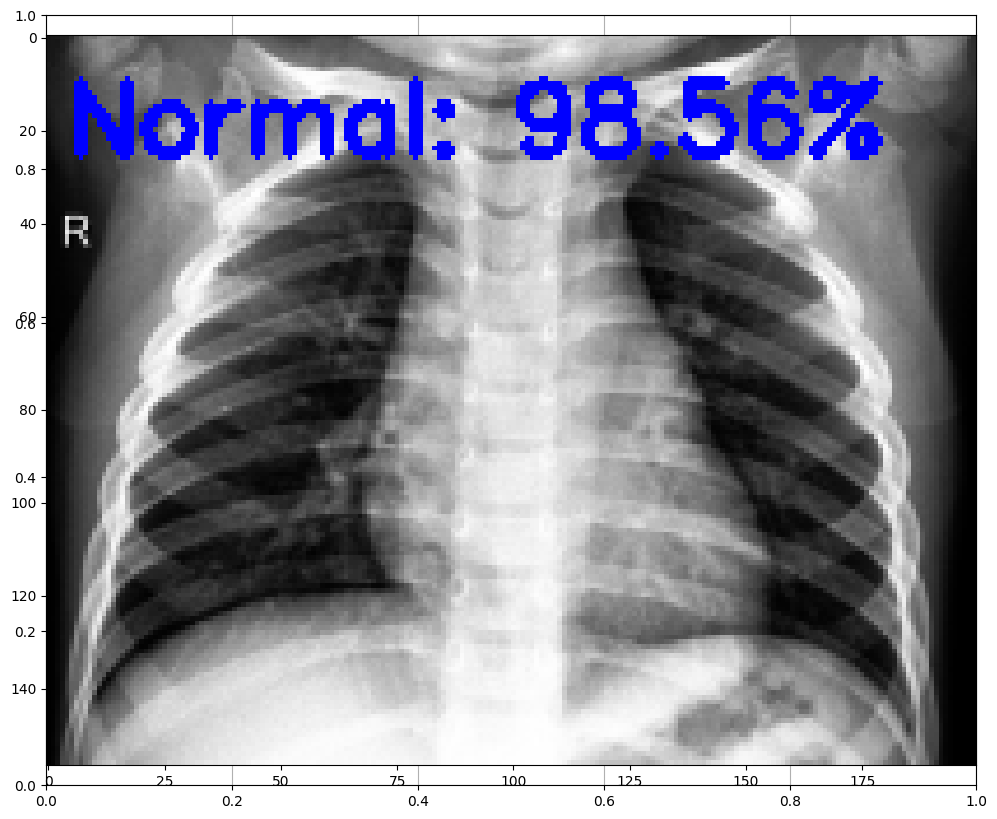

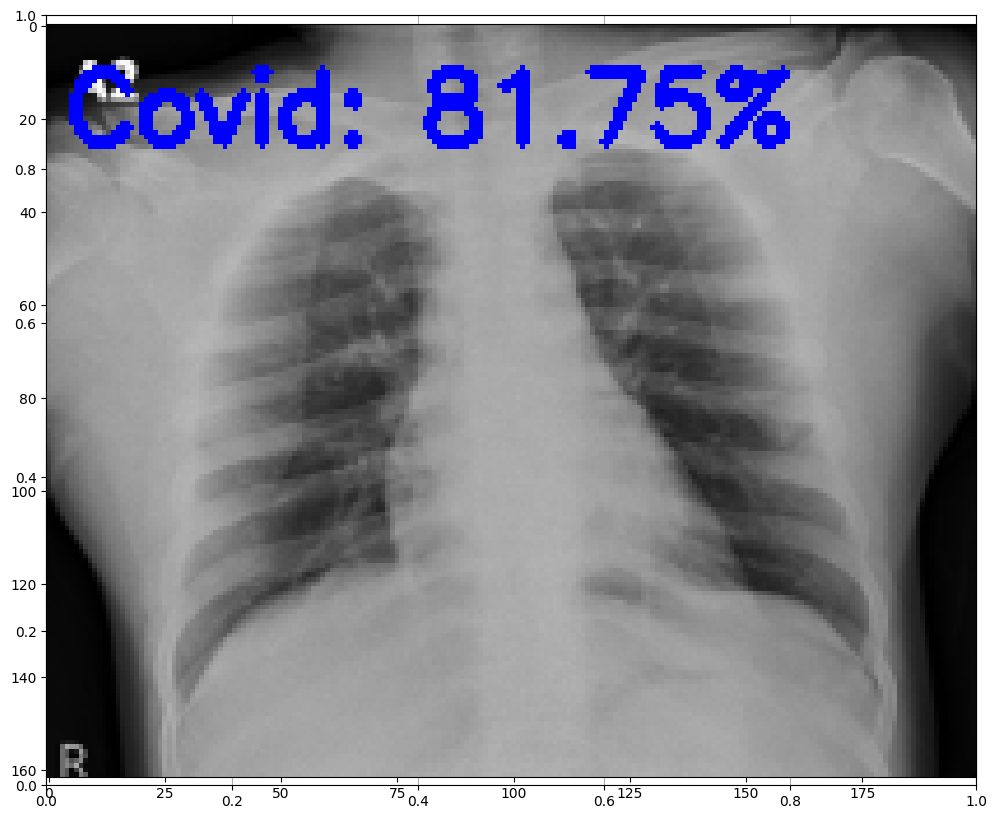

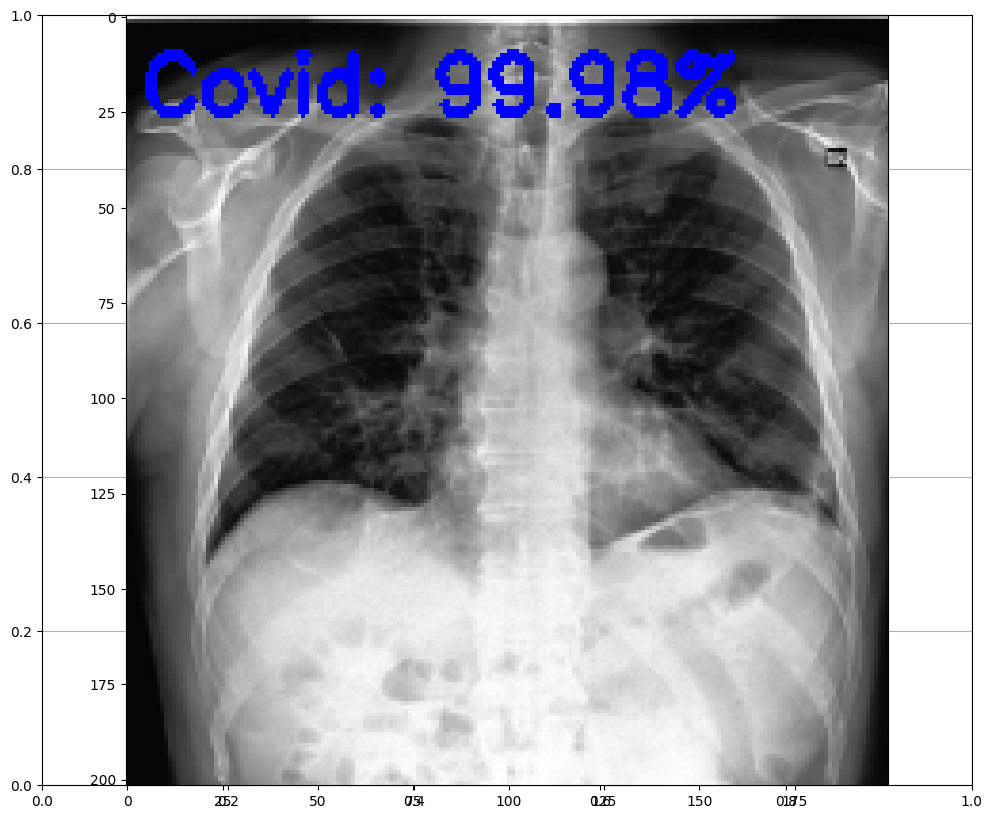

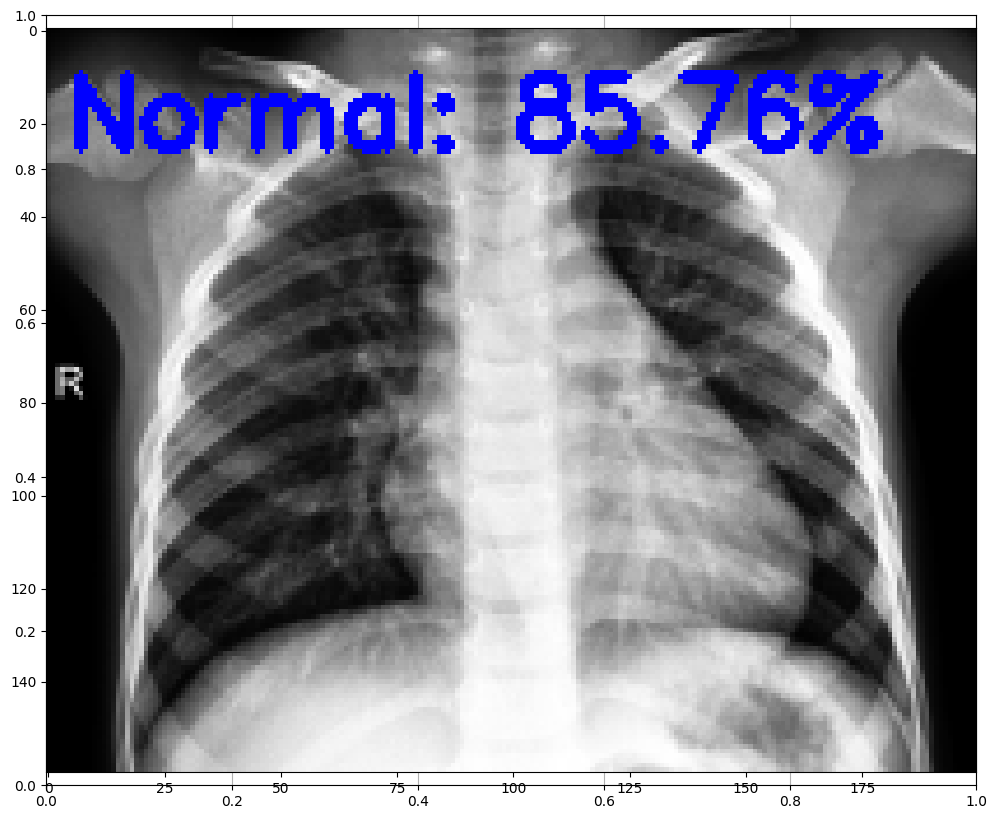

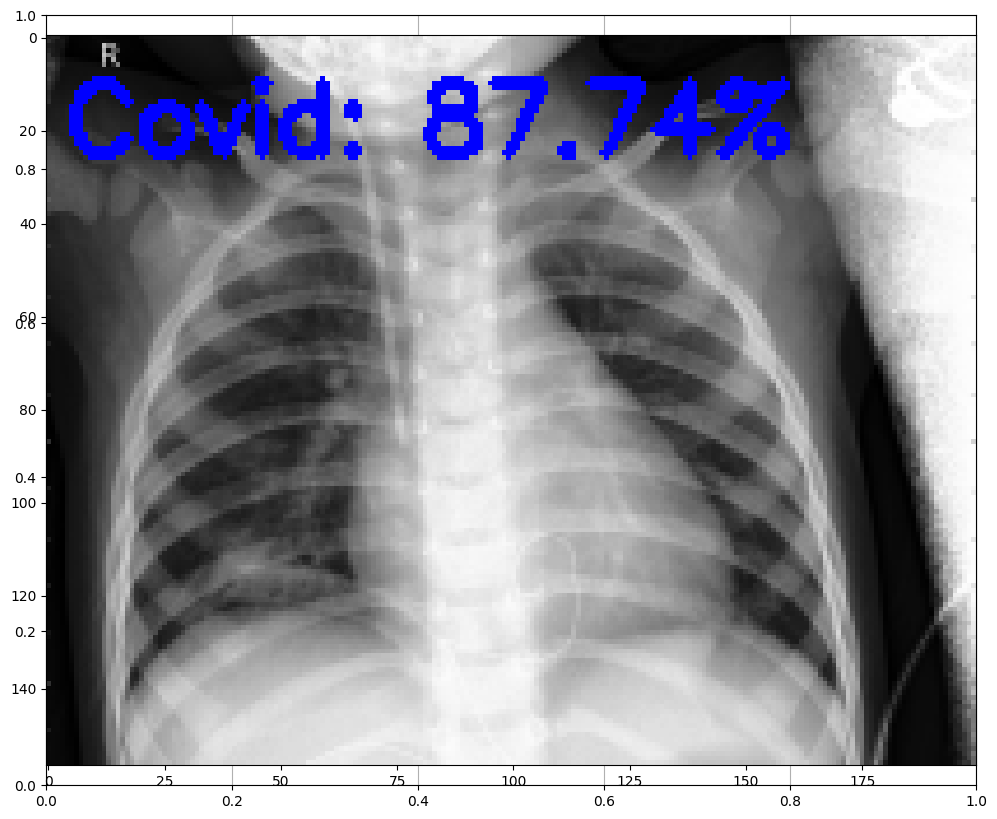

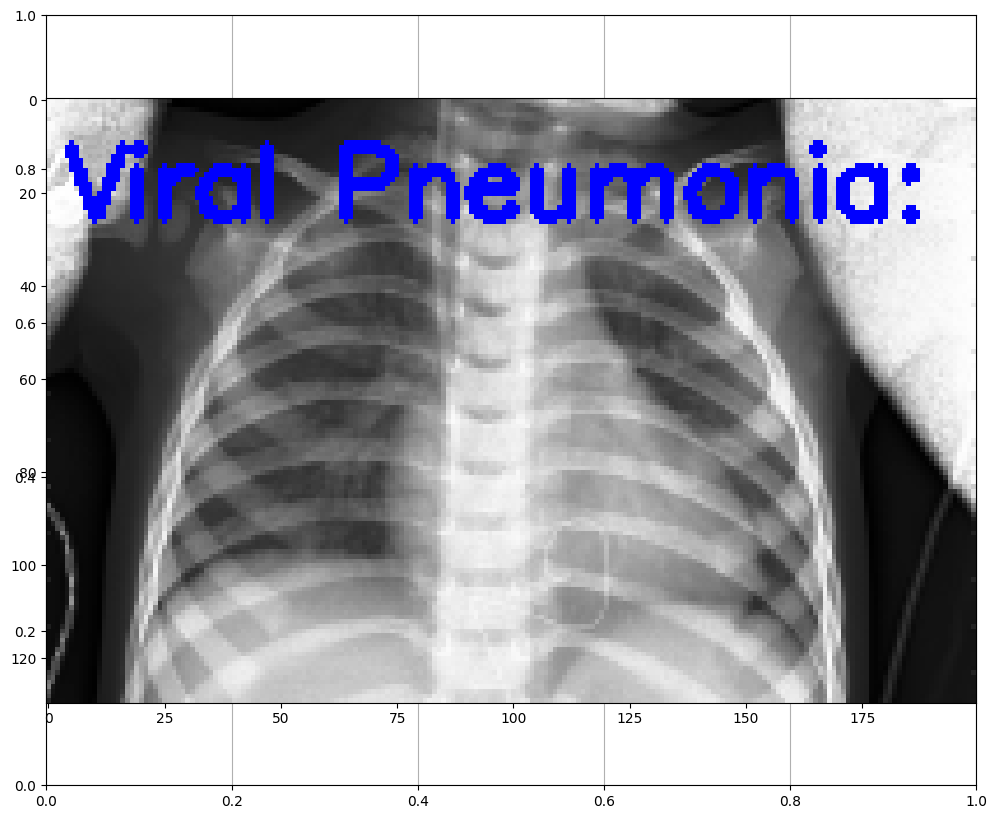

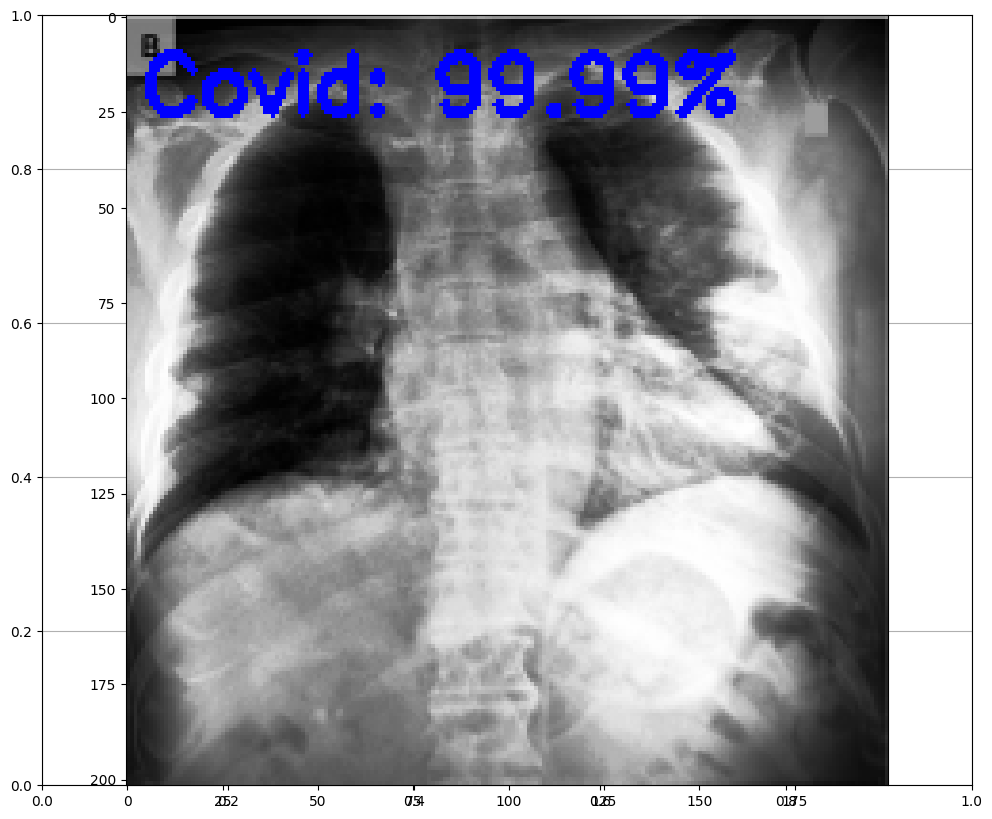

In [ ]:
from tqdm import tqdm_notebook as tqdm


print("[INFO] loading images...")

predicted_label = []
image_numbers = []


imagePaths = sorted(list(paths.list_images(test_path)))
random.seed(10)
random.shuffle(imagePaths)

with tqdm(total=len(imagePaths)) as pbar:

    for idx, imagePath in enumerate(imagePaths):

        image = cv2.imread(imagePath)
        orig = image.copy()
        image = cv2.resize(image, (224, 224))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        image_number = imagePath.split("/")[-2].split(".")[0]
        image_numbers.append(image_number)


        prd_conf = model.predict(image)[0]

        all_class = ["Covid","Normal","Viral Pneumonia"]

        label = all_class[np.argmax(prd_conf)]
        predicted_label.append(label)
        proba = prd_conf[np.argmax(prd_conf)]

        label = "{}: {:.2f}%".format(label, proba * 100)

        output = imutils.resize(orig, width=200)
        cv2.putText(output, label, (4, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)


        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

        pbar.update(1)


In [ ]:
predicted_label

['Normal',
 'Covid',
 'Covid',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Covid',
 'Viral Pneumonia',
 'Normal',
 'Normal',
 'Viral Pneumonia',
 'Normal',
 'Normal',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Covid',
 'Viral Pneumonia',
 'Normal',
 'Covid',
 'Covid',
 'Viral Pneumonia',
 'Normal',
 'Normal',
 'Viral Pneumonia',
 'Covid',
 'Covid',
 'Viral Pneumonia',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Covid',
 'Covid',
 'Viral Pneumonia',
 'Covid',
 'Covid',
 'Normal',
 'Covid',
 'Covid',
 'Normal',
 'Covid',
 'Normal',
 'Viral Pneumonia',
 'Covid',
 'Covid',
 'Viral Pneumonia',
 'Covid',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Covid',
 'Covid',
 'Covid',
 'Normal',
 'Covid',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Normal',
 'Covid',
 'Covid',
 'Normal',
 'Covid',
 'Viral Pneumonia',
 'Covid']

In [ ]:
import pandas as pd
df = pd.DataFrame({"Actual":image_numbers,"label":predicted_label})
df

Actual            label
0            Normal           Normal
1             Covid            Covid
2             Covid            Covid
3   Viral Pneumonia  Viral Pneumonia
4            Normal  Viral Pneumonia
..              ...              ...
61            Covid            Covid
62           Normal           Normal
63  Viral Pneumonia            Covid
64  Viral Pneumonia  Viral Pneumonia
65            Covid            Covid

[66 rows x 2 columns]

In [ ]:
df.replace({"Covid":0,"Normal":1,"Viral Pneumonia":2},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Actual  66 non-null     int64
 1   label   66 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['Actual'],df['label'])

In [ ]:
cm = pd.DataFrame(cm,)

In [ ]:
cm

0   1   2
0  26   0   0
1   0  16   4
2   2   3  15

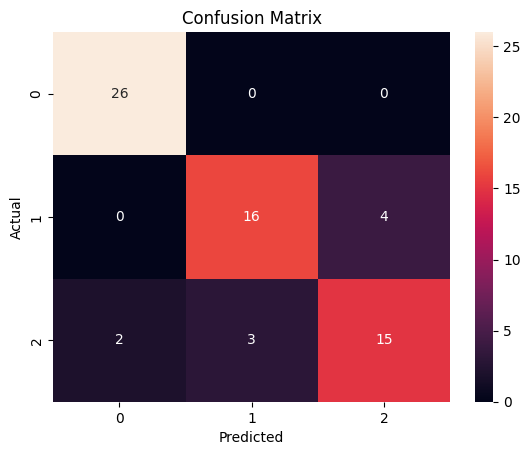

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt = 'g')

plt.title("Confusion Matrix")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()